In [1]:
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as scio
import os
from HS_reading import *

import warnings
warnings.filterwarnings("ignore")

onset_time = {"HS44":0,"HS45":0,"HS47":0,"HS48":0,"HS50":0,"HS54":0,"HS71":0,"HS73":0,"HS76":0,"HS78":0}

In [2]:
clean_data_path = "D:/BaiduSyncdisk/code/"

# 朗读任务
# 运动语音特征解释程度

# 先删除一下旧的feat_mat

In [3]:
import os

HS_list = [44,45,47,48,50,54,71,73,76,78]
for task_name in[ "overt",'covert','cue']:
    for HS in HS_list:
        if task_name == 'cue' and HS<70:
            continue
    
    
        save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
        if not os.path.exists(save_path):
            os.mkdir(save_path)
    
        mat_file_name = save_path+"HS"+str(HS)+"_"+task_name+"_"+"_feat_mat.npy"
        if os.path.exists(mat_file_name):
            os.remove(mat_file_name)
        
        feat_mat = get_feat(HS,task_name,clean_data_path)
        np.save(mat_file_name,feat_mat)
        print(HS,task_name)

ba
bu
da
du
ga
gu
44 overt
ba
bu
da
du
ga
gu
45 overt
ba
bu
da
du
ga
gu
47 overt
ba
bu
da
du
ga
gu
48 overt
ba
bu
da
du
ga
gu
50 overt
ba
bu
da
du
ga
gu
54 overt
ba
da
ga
pa
ta
ka
sa
sha
71 overt
ba
da
ga
pa
ta
ka
sa
sha
73 overt
ba
da
ga
pa
ta
ka
sa
sha
76 overt
ba
da
ga
pa
ta
ka
sa
sha
78 overt
44
6 6
44 covert
45
6 6
45 covert
47
6 6
47 covert
48
6 6
48 covert
50
6 6
50 covert
54
6 6
54 covert
71
8 8
71 covert
73
8 8
73 covert
76
8 8
76 covert
78
8 8
78 covert
71
8 8
71 cue
73
8 8
73 cue
76
8 8
76 cue
78
8 8
78 cue


<AxesSubplot:>

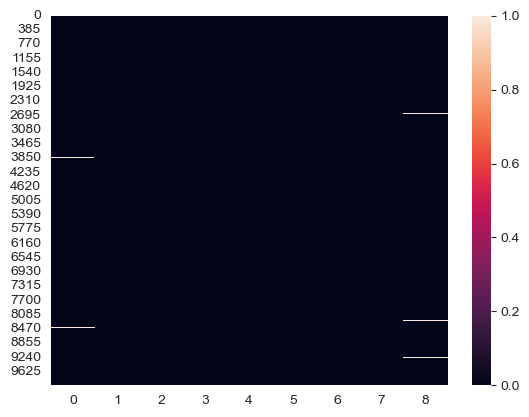

In [8]:
sns.heatmap(feat_mat['phoneme_onehot'][:10000,:])

<AxesSubplot:>

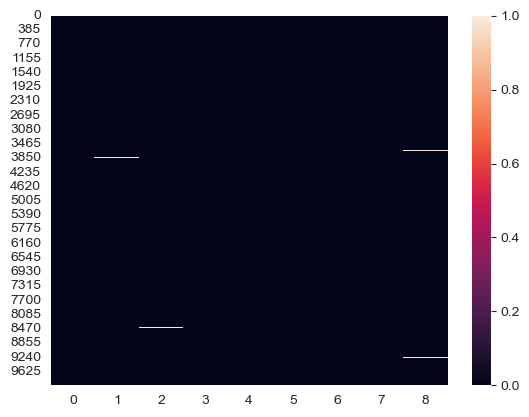

In [11]:
sns.heatmap(feat_mat['phoneme_onehot'][10000:20000,:])

In [3]:
HS_list = [76]
total_r2 = {}
total_pred_dict = {}
task_name = "overt"
nn_features = ['absPitch', 'relPitch', 'drelPitch']


for HS in HS_list:
    print(HS)


    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    mat_file_name = save_path+"HS"+str(HS)+"_"+task_name+"_"+"_feat_mat.npy"
    if os.path.exists(mat_file_name):
        feat_mat = np.load(mat_file_name,allow_pickle=True).item()
    else:
        feat_mat = get_feat(HS,task_name)
        np.save(mat_file_name,feat_mat)

    # ds = 0.6
    fs = 10
    ds_a = -30
    ds_p = 30
    delays = np.arange(ds_a, ds_p)

    r2_channel = {}
    r_channel = {}
    wts_folds_all = {}
    best_alphas_all = {}

    for nn_feat_name in nn_features:
        print(nn_feat_name)
        dstim = feat_mat[nn_feat_name]
        resp = feat_mat["hg"]
        test_corr_folds, wts_folds, best_alphas, pred_all = run_cv_temporal_ridge_regression_model(
            dstim, resp, delays=delays, pred=True)
        r2 = np.sum(test_corr_folds ** 2, axis=0) / test_corr_folds.shape[0]
        r = np.mean(test_corr_folds, axis=0)
        
        r2_channel[nn_feat_name] = r2
        r_channel[nn_feat_name] = r
        wts_folds_all[nn_feat_name] = wts_folds
        best_alphas_all[nn_feat_name] = best_alphas

#     np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_r2_channel.npy",r2_channel)
#     np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy",r_channel)
#     np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_wts_folds_all.npy",wts_folds_all)
#     np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_best_alphas_all.npy",best_alphas_all)
#     print(str(HS)+" complete")

76
ba
da
ga
pa
ta
ka
sa
sha
absPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. relPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. drelPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. 

76


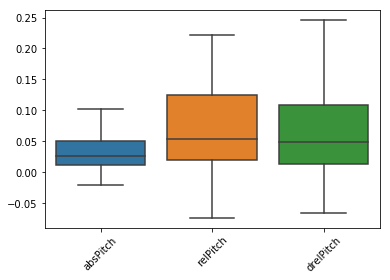

In [4]:
HS_list = [76]
task_name = "overt"

for HS in HS_list:
    print(HS)
#     save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
#     r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()
#     plt.figure(figsize=(30,10))
    ax = sns.boxplot(data=pd.DataFrame(r_channel))
    ax.set_xticklabels(r_channel.keys(),rotation=45)

In [5]:
# HS_list = [44,45,47,48,50,54,71,73,76]
HS_list = [78]

total_r2 = {}
total_pred_dict = {}
task_name = "overt"
nn_features = ['syllable', 'phoneme', 'intensity', 'f1', 'f2', 'Env', 'peakRate', 
               'mel', 'trace', 'absPitch', 'relPitch', 'drelPitch', 
               'bilabial', 'secondary labial', 'alveolar', 'velar', 
               'mandibular', 'voiced', 'oral stop', 'fricative', 
               'back tongue', 'high tongue', 'lip rounding', 
               'jaw open', 'phonetics', 'consonantal_place', 
               'consonantal_manner', 'vowel_place', 
               'lower_incisor', 'upper_lip', 'lower_lip', 
               'tongue_tip', 'tongue_body', 'tongue_dorsum', 
               'tongue', 'lip']


for HS in HS_list:
    print(HS)


    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    mat_file_name = save_path+"HS"+str(HS)+"_"+task_name+"_"+"_feat_mat.npy"
    if os.path.exists(mat_file_name):
        feat_mat = np.load(mat_file_name,allow_pickle=True).item()
    else:
        feat_mat = get_feat(HS,task_name)
        np.save(mat_file_name,feat_mat)

    # ds = 0.6
    fs = 10
    ds_a = -30
    ds_p = 30
    delays = np.arange(ds_a, ds_p)

    r2_channel = {}
    r_channel = {}
    wts_folds_all = {}a
    best_alphas_all = {}

    for nn_feat_name in nn_features:
        print(nn_feat_name)
        dstim = feat_mat[nn_feat_name]
        resp = feat_mat["hg"]
        test_corr_folds, wts_folds, best_alphas, pred_all = run_cv_temporal_ridge_regression_model(
            dstim, resp, delays=delays, pred=True)
        r2 = np.sum(test_corr_folds ** 2, axis=0) / test_corr_folds.shape[0]
        r = np.mean(test_corr_folds, axis=0)
        
        r2_channel[nn_feat_name] = r2
        r_channel[nn_feat_name] = r
        wts_folds_all[nn_feat_name] = wts_folds
        best_alphas_all[nn_feat_name] = best_alphas

    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_r2_channel.npy",r2_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy",r_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_wts_folds_all.npy",wts_folds_all)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_best_alphas_all.npy",best_alphas_all)
    print(str(HS)+" complete")

78
ba
da
ga
pa
ta
ka
sa
sha
syllable
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. phoneme
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. intensity
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. f1
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. f2
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. Env
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. peakRate
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. mel
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. trace
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. absPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. relPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. drelPitch
Running 

44
45
47
48
50
54
71
73
76
78


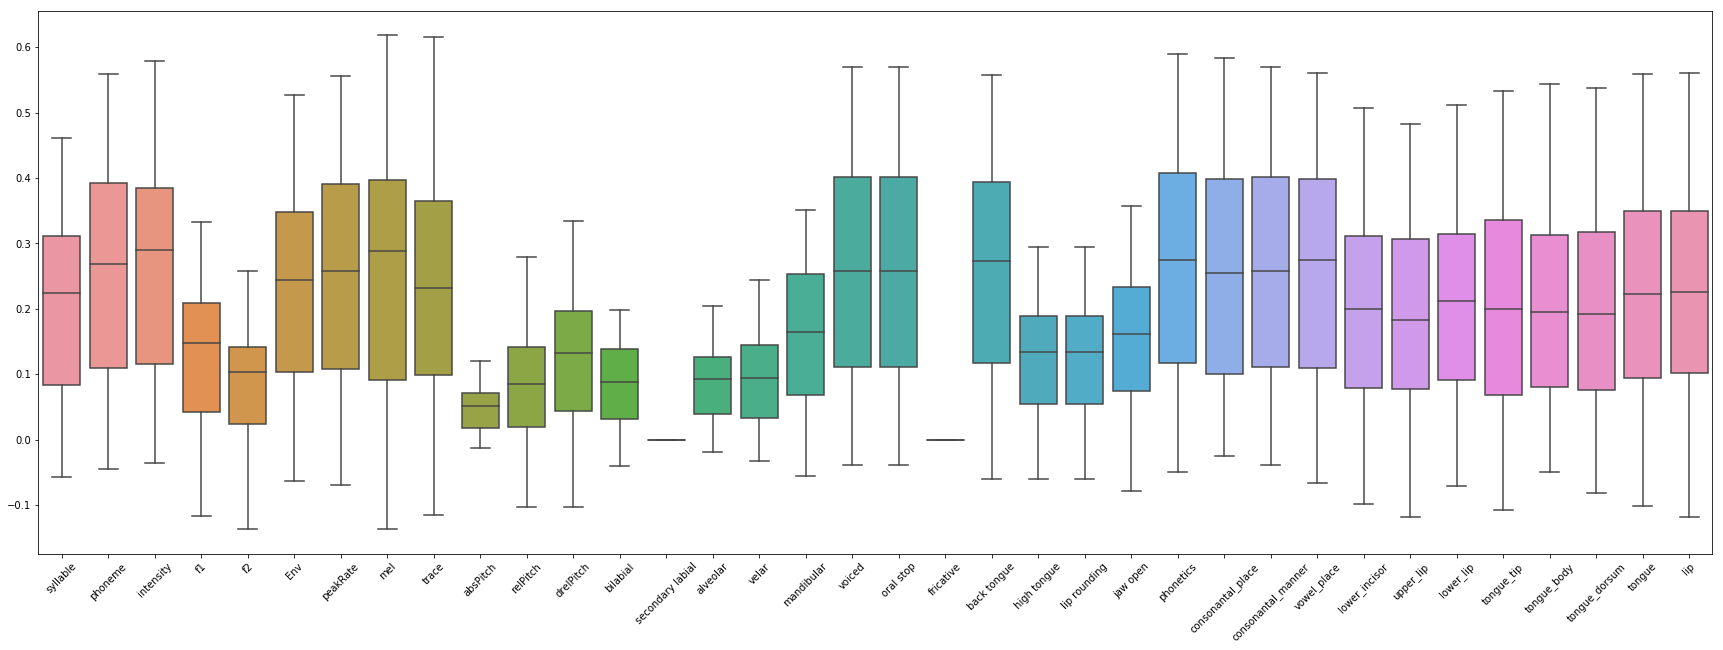

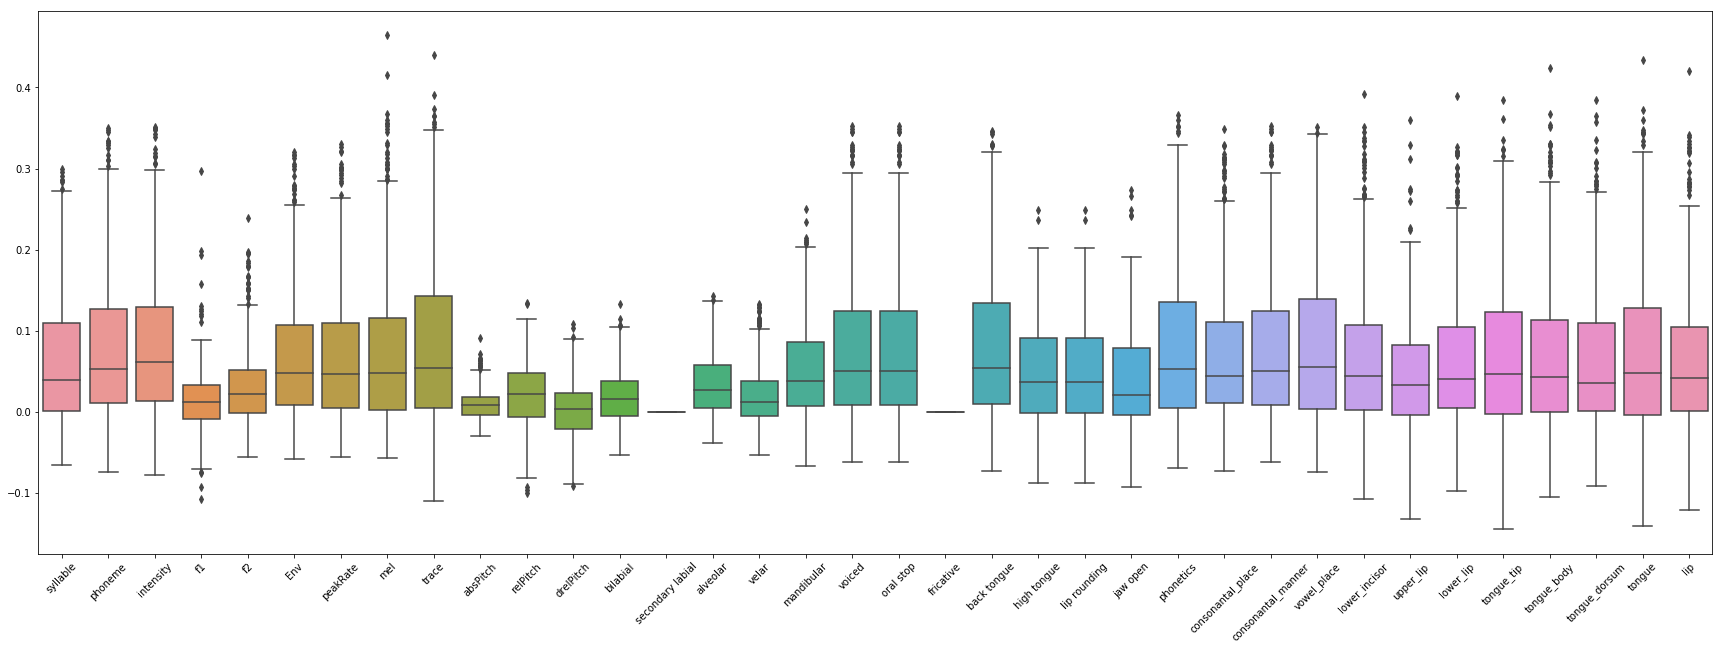

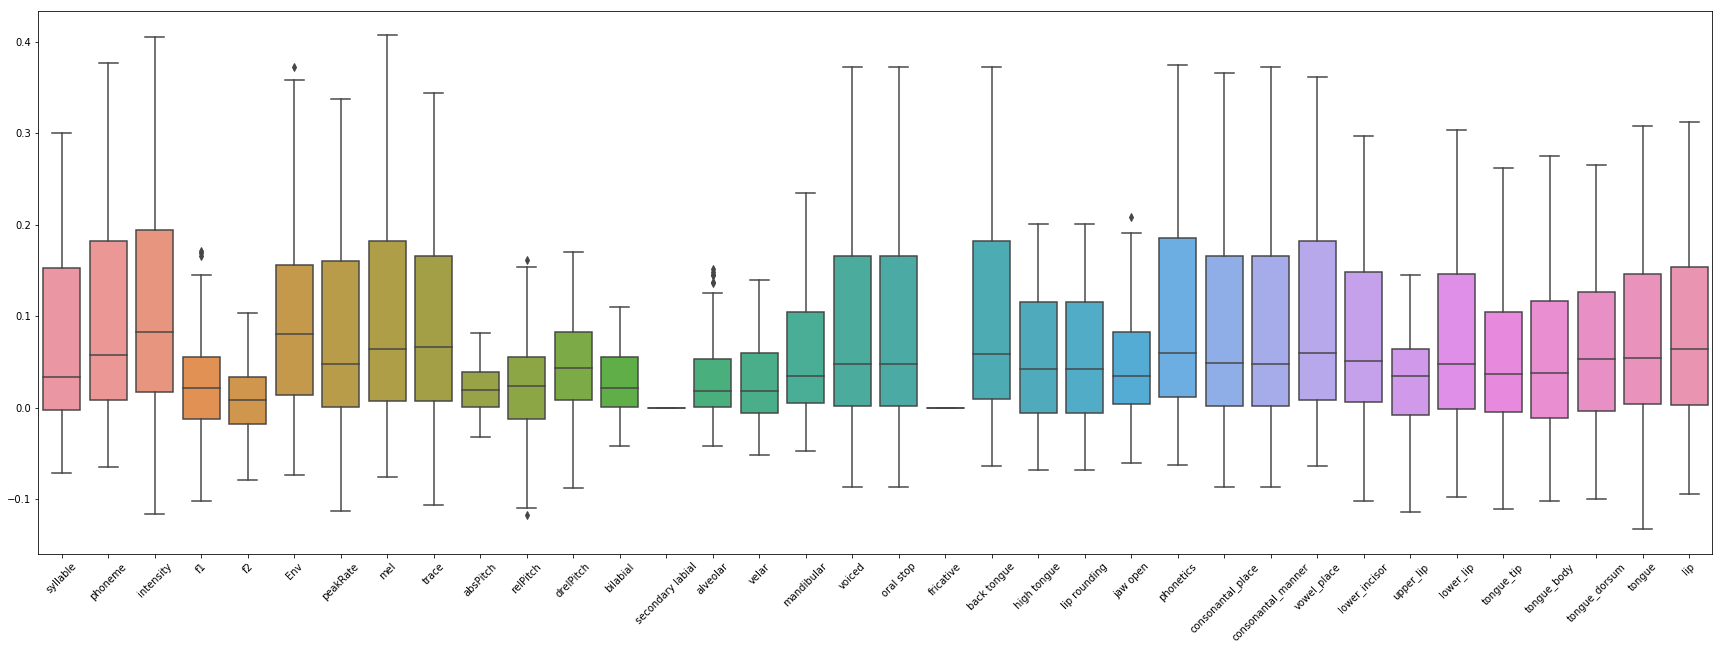

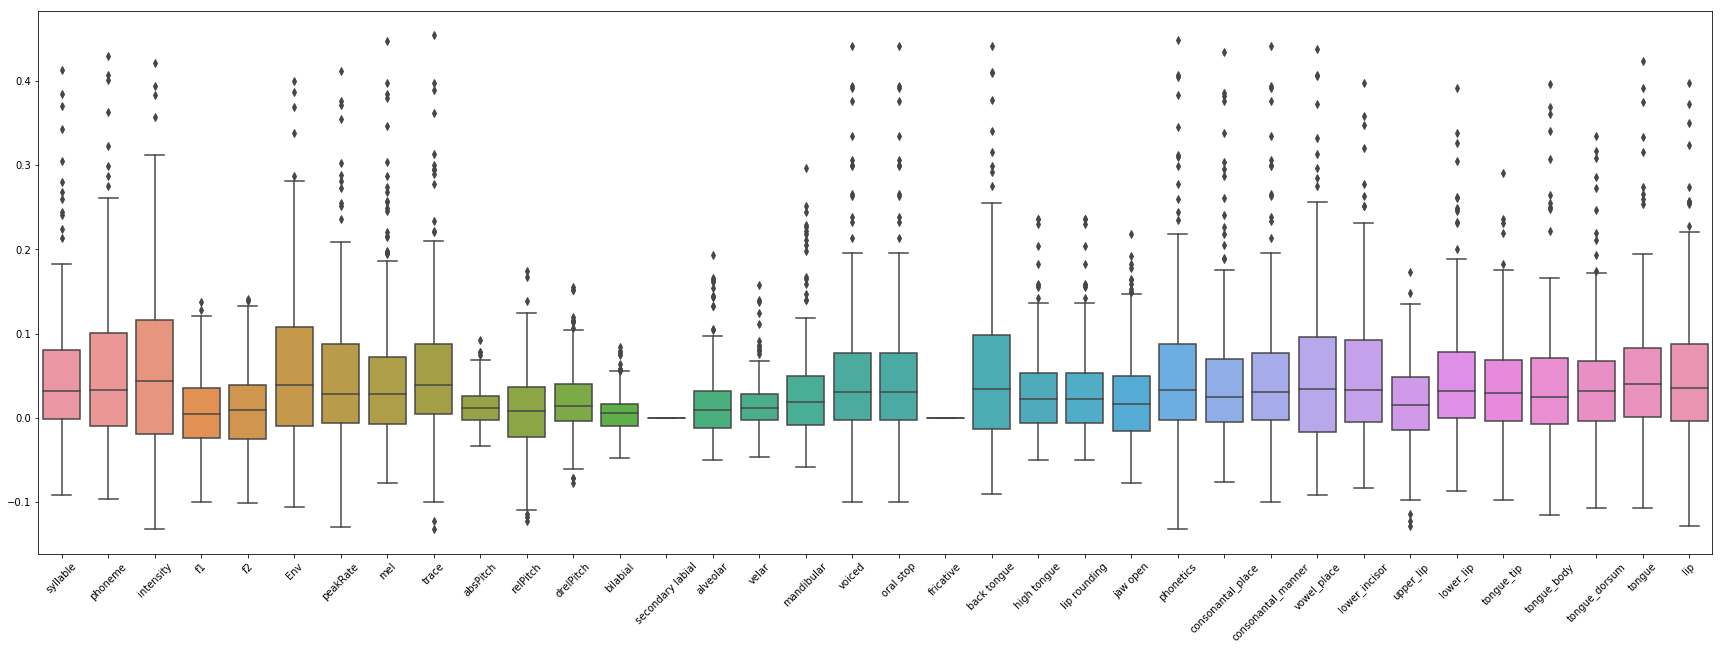

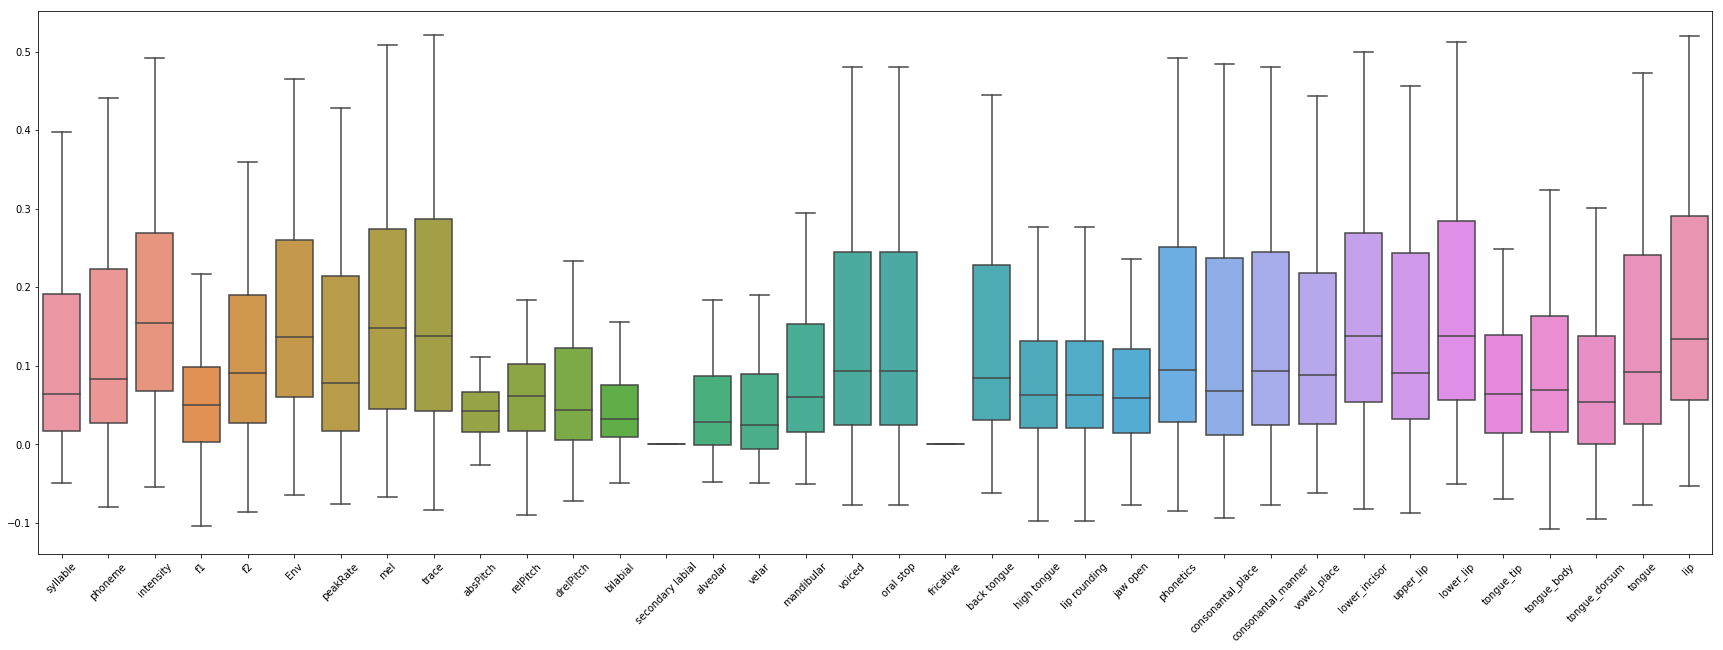

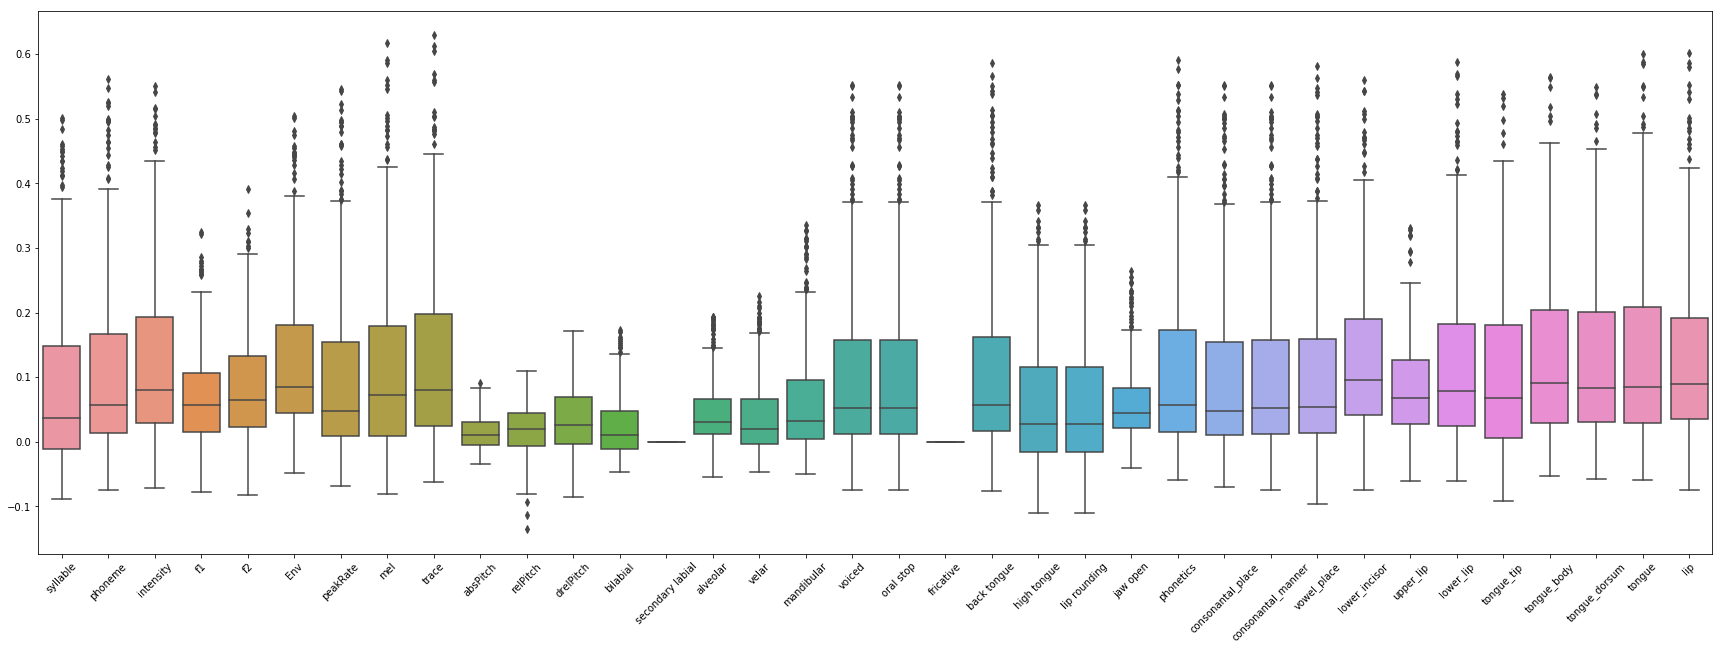

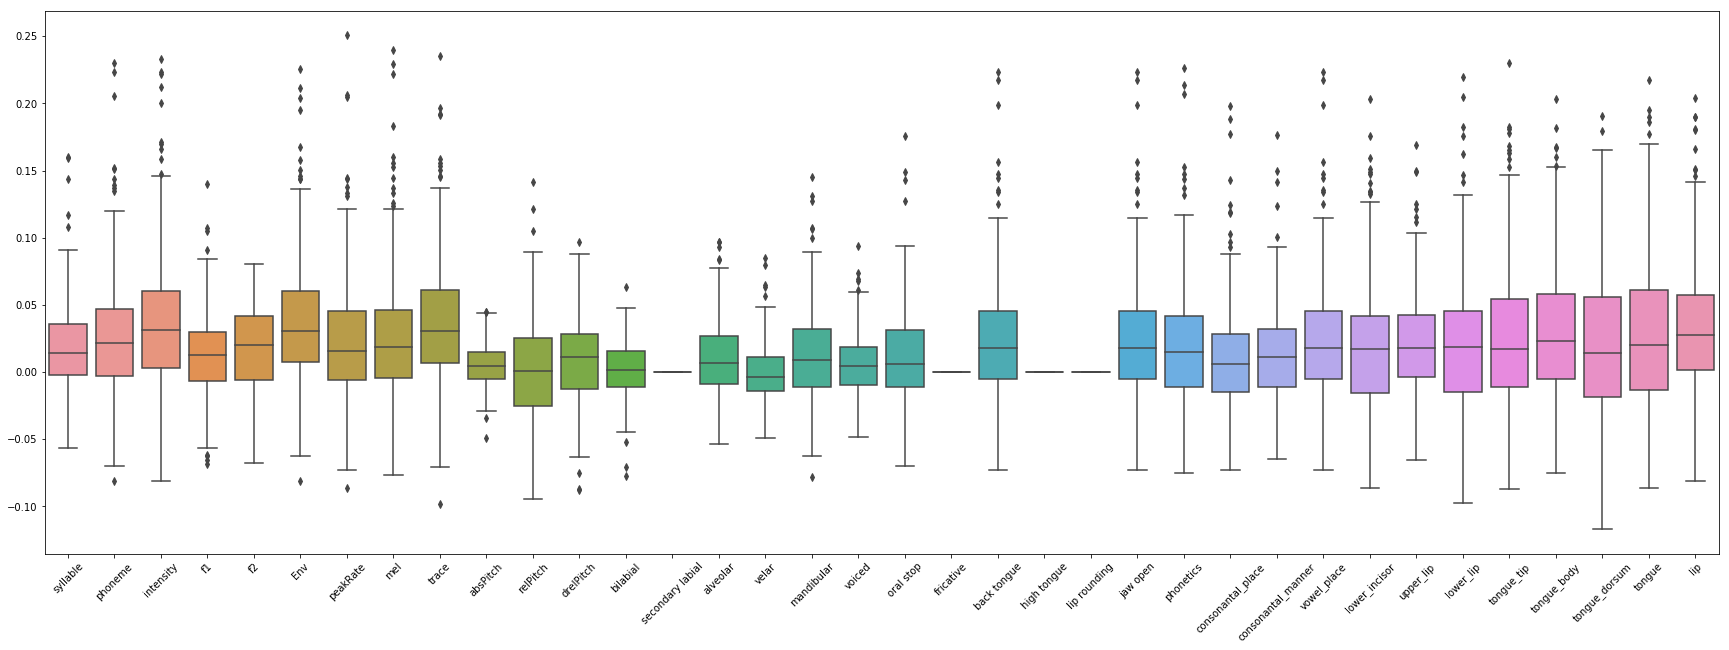

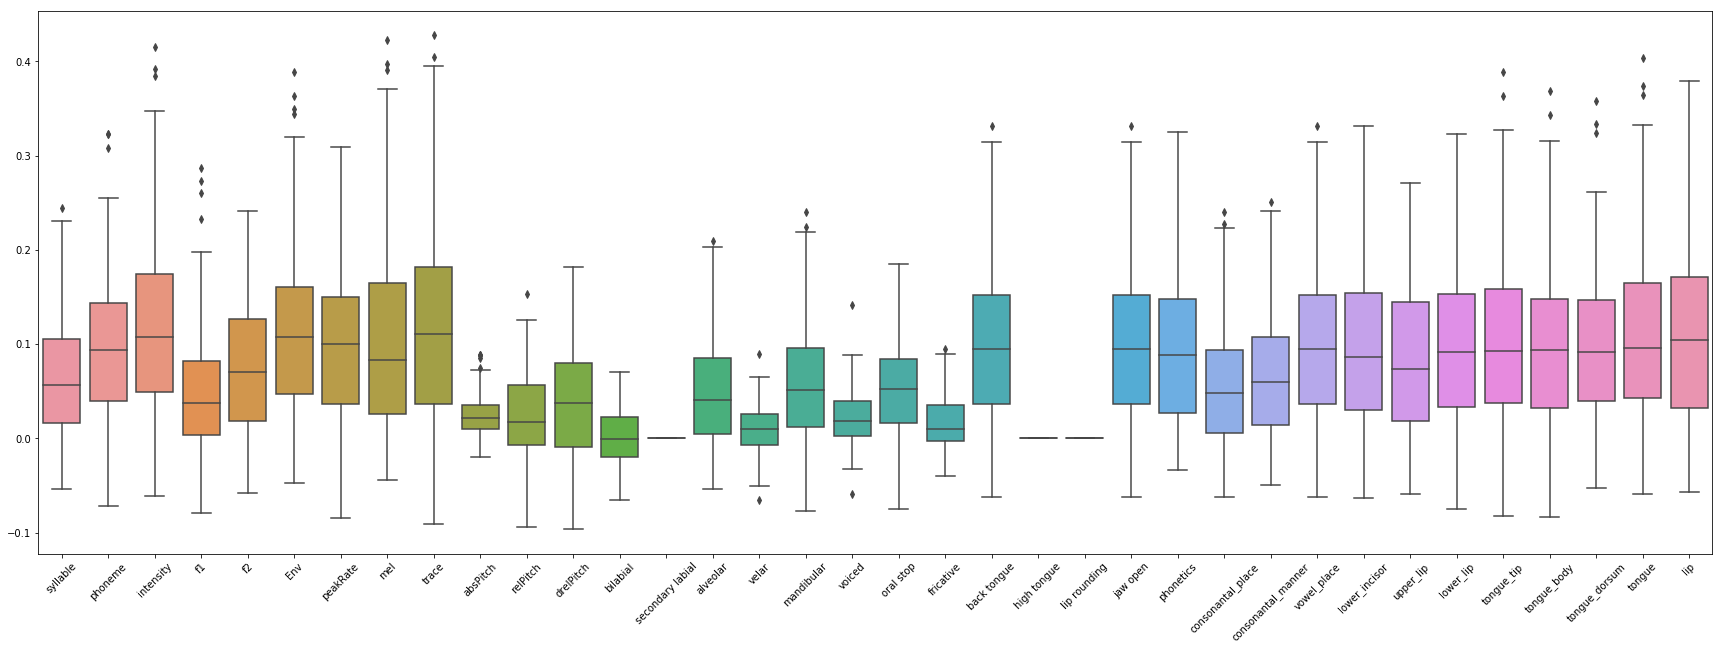

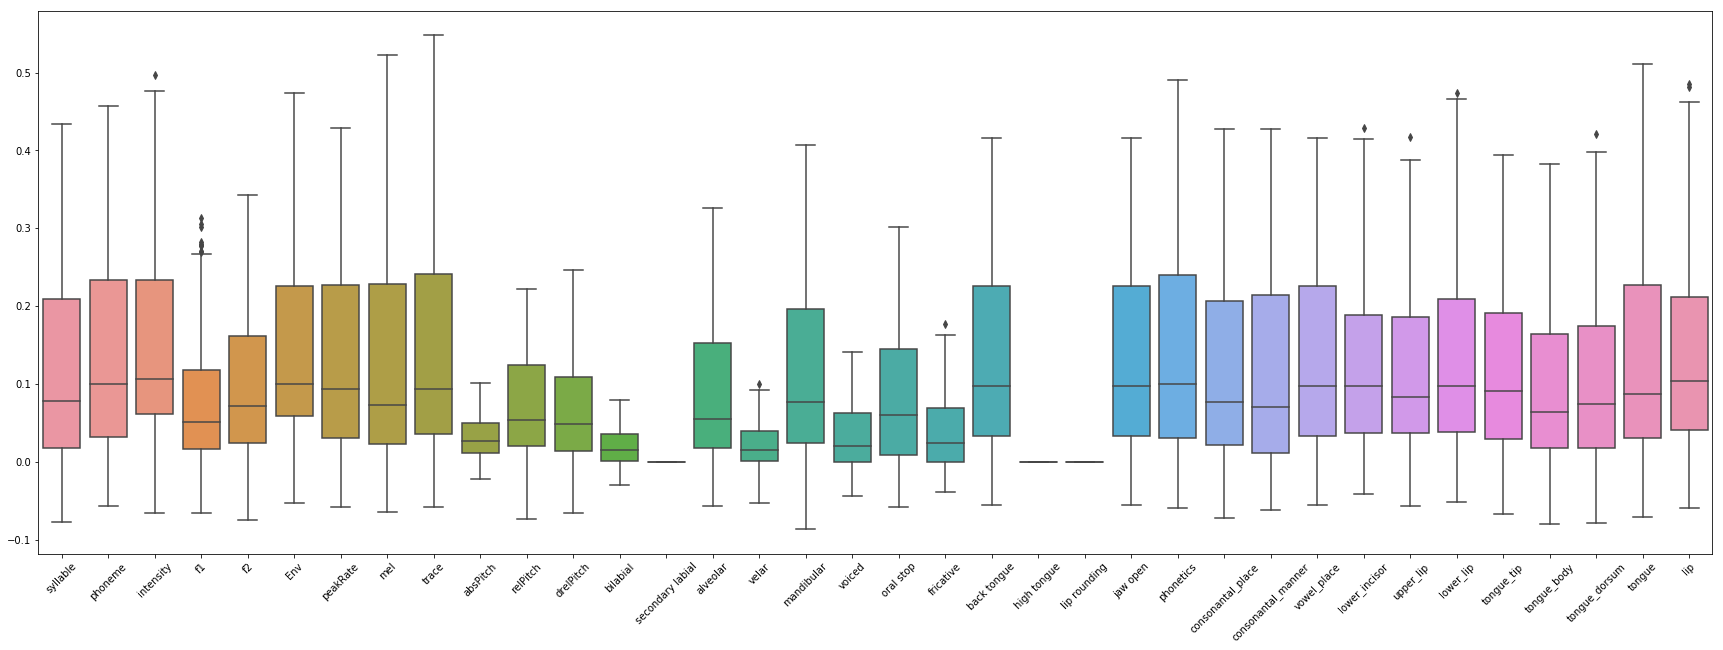

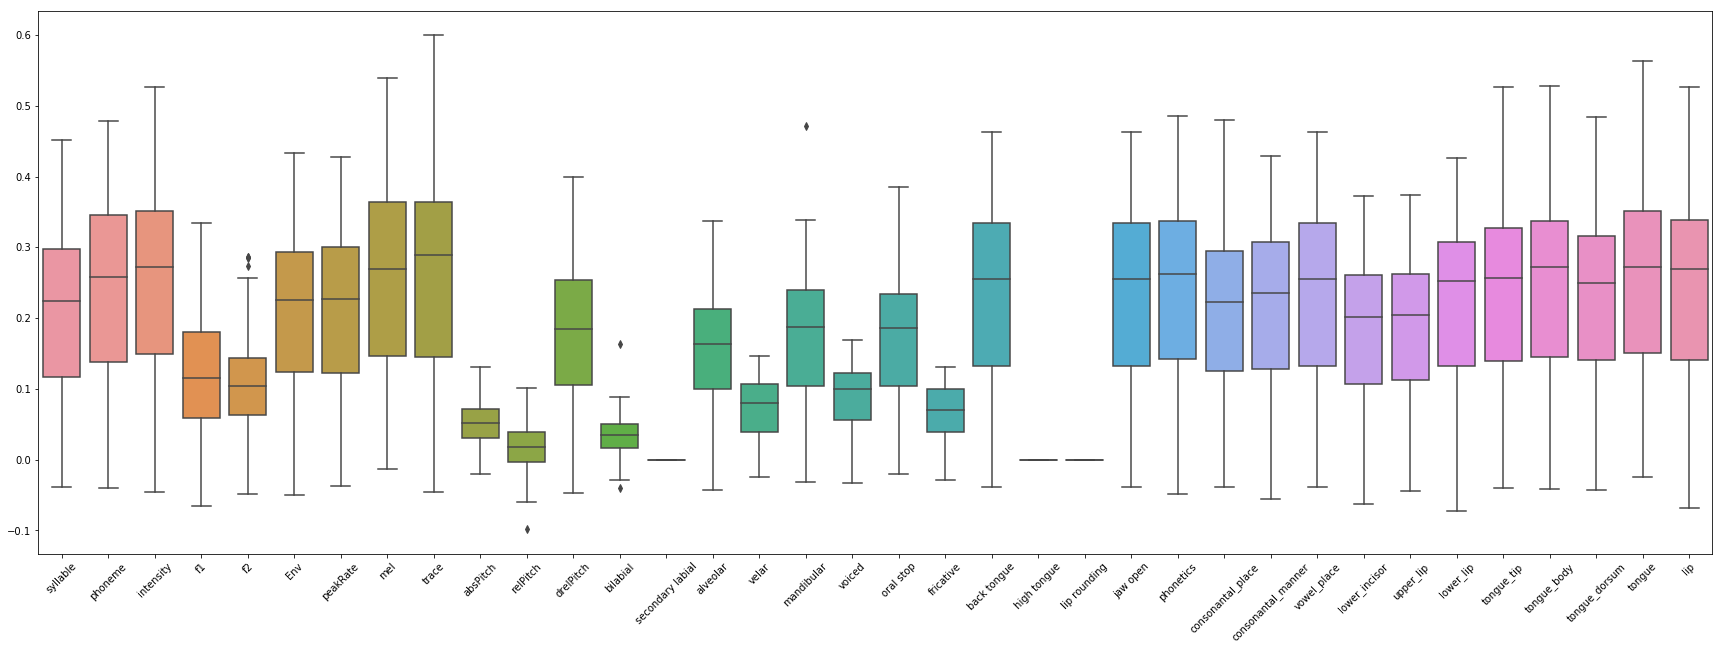

In [6]:
HS_list = [44,45,47,48,50,54,71,73,76,78]
# HS_list = [78]

task_name = "overt"

for HS in HS_list:
    print(HS)
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()
    plt.figure(figsize=(30,10))
    ax = sns.boxplot(data=pd.DataFrame(r_channel))
    ax.set_xticklabels(r_channel.keys(),rotation=45)

73


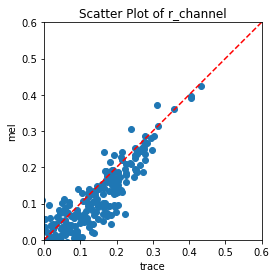

76


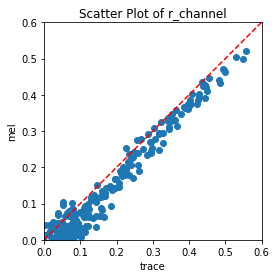

In [13]:
HS_list = [73,76]
task_name = "overt"
x_label = "trace"
y_label = "mel"


for HS in HS_list:
    print(HS)
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()

    # 提取r_channel字典中的'trace'和'mel'作为x和y轴数据
    x = r_channel[x_label]
    y = r_channel[y_label]

    # 绘制散点图
    plt.scatter(x, y)

    # 设置x和y轴的范围相同，使其对称
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.plot([0, 0.6], [0, 0.6], color='red', linestyle='--')

    # 设置x和y轴的范围为0到0.6
    plt.xlim(0, 0.6)
    plt.ylim(0, 0.6)
    
    # 添加标题和轴标签
    plt.title('Scatter Plot of r_channel')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # 显示图形
    plt.show()

73


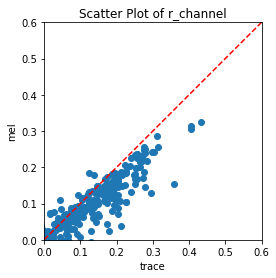

76


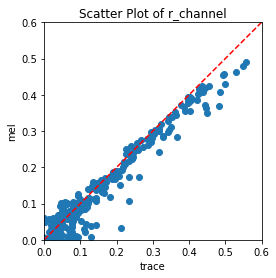

In [14]:
HS_list = [73,76]
task_name = "overt"
x_label = "trace"
y_label = "phonetics"


for HS in HS_list:
    print(HS)
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()

    # 提取r_channel字典中的'trace'和'mel'作为x和y轴数据
    x = r_channel[x_label]
    y = r_channel[y_label]

    # 绘制散点图
    plt.scatter(x, y)

    # 设置x和y轴的范围相同，使其对称
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.plot([0, 0.6], [0, 0.6], color='red', linestyle='--')

    # 设置x和y轴的范围为0到0.6
    plt.xlim(0, 0.6)
    plt.ylim(0, 0.6)
    
    # 添加标题和轴标签
    plt.title('Scatter Plot of r_channel')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # 显示图形
    plt.show()

In [7]:
# HS_list = [44,45,47,48,50,54,71,73,76]
HS_list = [78]

total_r2 = {}
total_pred_dict = {}
task_name = "covert"
nn_features = ['syllable', 'phoneme', 'intensity', 'f1', 'f2', 'Env', 'peakRate', 
               'mel', 'trace', 'absPitch', 'relPitch', 'drelPitch', 
               'bilabial', 'secondary labial', 'alveolar', 'velar', 
               'mandibular', 'voiced', 'oral stop', 'fricative', 
               'back tongue', 'high tongue', 'lip rounding', 
               'jaw open', 'phonetics', 'consonantal_place', 
               'consonantal_manner', 'vowel_place', 
               'lower_incisor', 'upper_lip', 'lower_lip', 
               'tongue_tip', 'tongue_body', 'tongue_dorsum', 
               'tongue', 'lip']


for HS in HS_list:
    print(HS)


    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    mat_file_name = save_path+"HS"+str(HS)+"_"+task_name+"_"+"_feat_mat.npy"
    if os.path.exists(mat_file_name):
        feat_mat = np.load(mat_file_name,allow_pickle=True).item()
    else:
        feat_mat = get_feat(HS,task_name)
        np.save(mat_file_name,feat_mat)

    # ds = 0.6
    fs = 10
    ds_a = -30
    ds_p = 30
    delays = np.arange(ds_a, ds_p)

    r2_channel = {}
    r_channel = {}
    wts_folds_all = {}
    best_alphas_all = {}

    for nn_feat_name in nn_features:
        print(nn_feat_name)
        dstim = feat_mat[nn_feat_name]
        resp = feat_mat["hg"]
        test_corr_folds, wts_folds, best_alphas, pred_all = run_cv_temporal_ridge_regression_model(
            dstim, resp, delays=delays, pred=True)
        r2 = np.sum(test_corr_folds ** 2, axis=0) / test_corr_folds.shape[0]
        r = np.mean(test_corr_folds, axis=0)
        
        r2_channel[nn_feat_name] = r2
        r_channel[nn_feat_name] = r
        wts_folds_all[nn_feat_name] = wts_folds
        best_alphas_all[nn_feat_name] = best_alphas

    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_r2_channel.npy",r2_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy",r_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_wts_folds_all.npy",wts_folds_all)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_best_alphas_all.npy",best_alphas_all)
    print(str(HS)+" complete")

78
78
8 8
syllable
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. phoneme
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. intensity
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. f1
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. f2
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. Env
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. peakRate
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. mel
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. trace
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. absPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. relPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. drelPitch
Running fold 0. Running fo

In [8]:
# HS_list = [71,73,76,78]
HS_list = [78]

total_r2 = {}
total_pred_dict = {}
task_name = "cue"
nn_features = ['syllable', 'phoneme', 'intensity', 'f1', 'f2', 'Env', 'peakRate', 
               'mel', 'trace', 'absPitch', 'relPitch', 'drelPitch', 
               'bilabial', 'secondary labial', 'alveolar', 'velar', 
               'mandibular', 'voiced', 'oral stop', 'fricative', 
               'back tongue', 'high tongue', 'lip rounding', 
               'jaw open', 'phonetics', 'consonantal_place', 
               'consonantal_manner', 'vowel_place', 
               'lower_incisor', 'upper_lip', 'lower_lip', 
               'tongue_tip', 'tongue_body', 'tongue_dorsum', 
               'tongue', 'lip']


for HS in HS_list:
    print(HS)


    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    mat_file_name = save_path+"HS"+str(HS)+"_"+task_name+"_"+"_feat_mat.npy"
    if os.path.exists(mat_file_name):
        feat_mat = np.load(mat_file_name,allow_pickle=True).item()
    else:
        feat_mat = get_feat(HS,task_name)
        np.save(mat_file_name,feat_mat)

    # ds = 0.6
    fs = 10
    ds_a = -30
    ds_p = 30
    delays = np.arange(ds_a, ds_p)

    r2_channel = {}
    r_channel = {}
    wts_folds_all = {}
    best_alphas_all = {}

    for nn_feat_name in nn_features:
        print(nn_feat_name)
        dstim = feat_mat[nn_feat_name]
        resp = feat_mat["hg"]
        test_corr_folds, wts_folds, best_alphas, pred_all = run_cv_temporal_ridge_regression_model(
            dstim, resp, delays=delays, pred=True)
        r2 = np.sum(test_corr_folds ** 2, axis=0) / test_corr_folds.shape[0]
        r = np.mean(test_corr_folds, axis=0)
        
        r2_channel[nn_feat_name] = r2
        r_channel[nn_feat_name] = r
        wts_folds_all[nn_feat_name] = wts_folds
        best_alphas_all[nn_feat_name] = best_alphas

    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_r2_channel.npy",r2_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy",r_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_wts_folds_all.npy",wts_folds_all)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_best_alphas_all.npy",best_alphas_all)
    print(str(HS)+" complete")

78
78
8 8
syllable
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. phoneme
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. intensity
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. f1
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. f2
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. Env
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. peakRate
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. mel
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. trace
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. absPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. relPitch
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. drelPitch
Running fold 0. Running fo

71
73
76
78


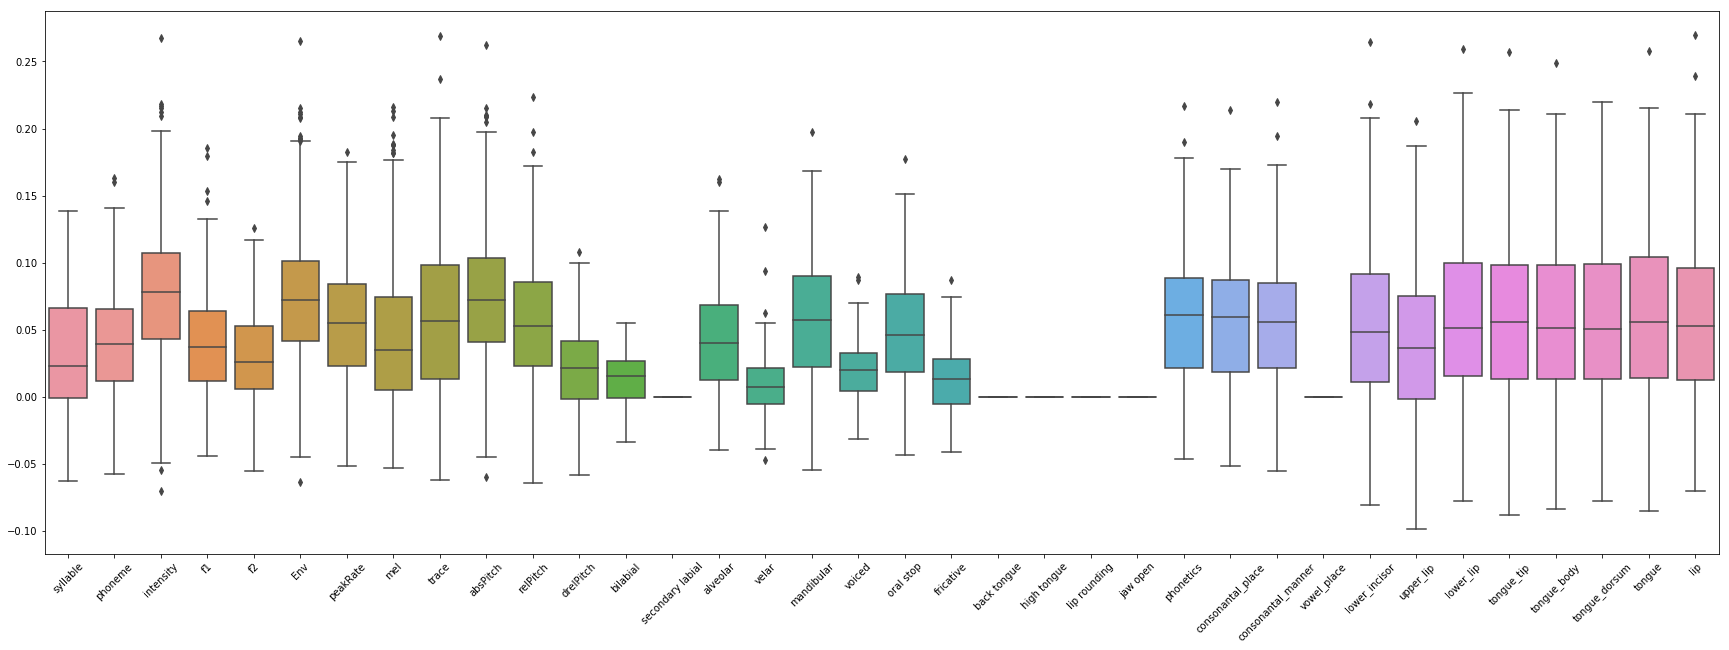

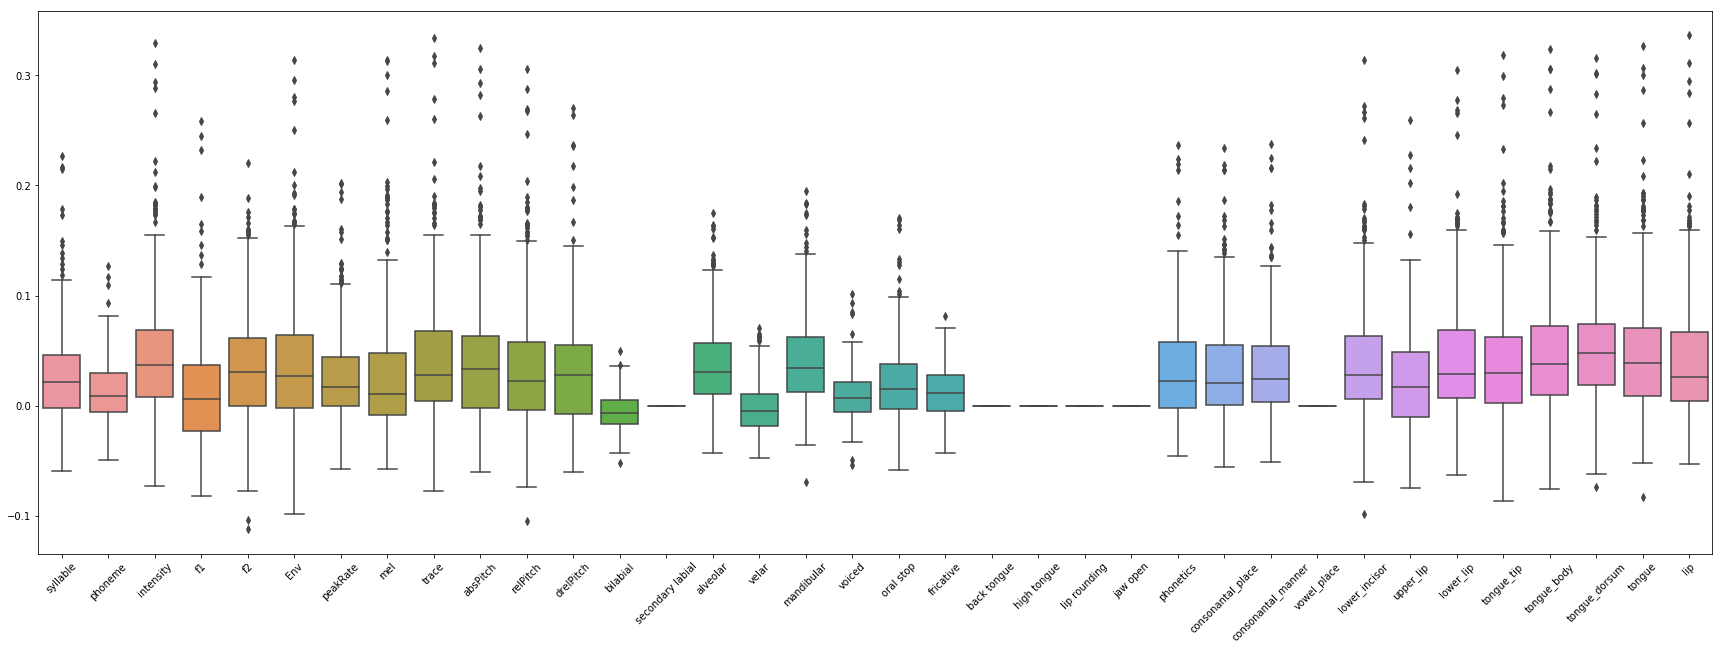

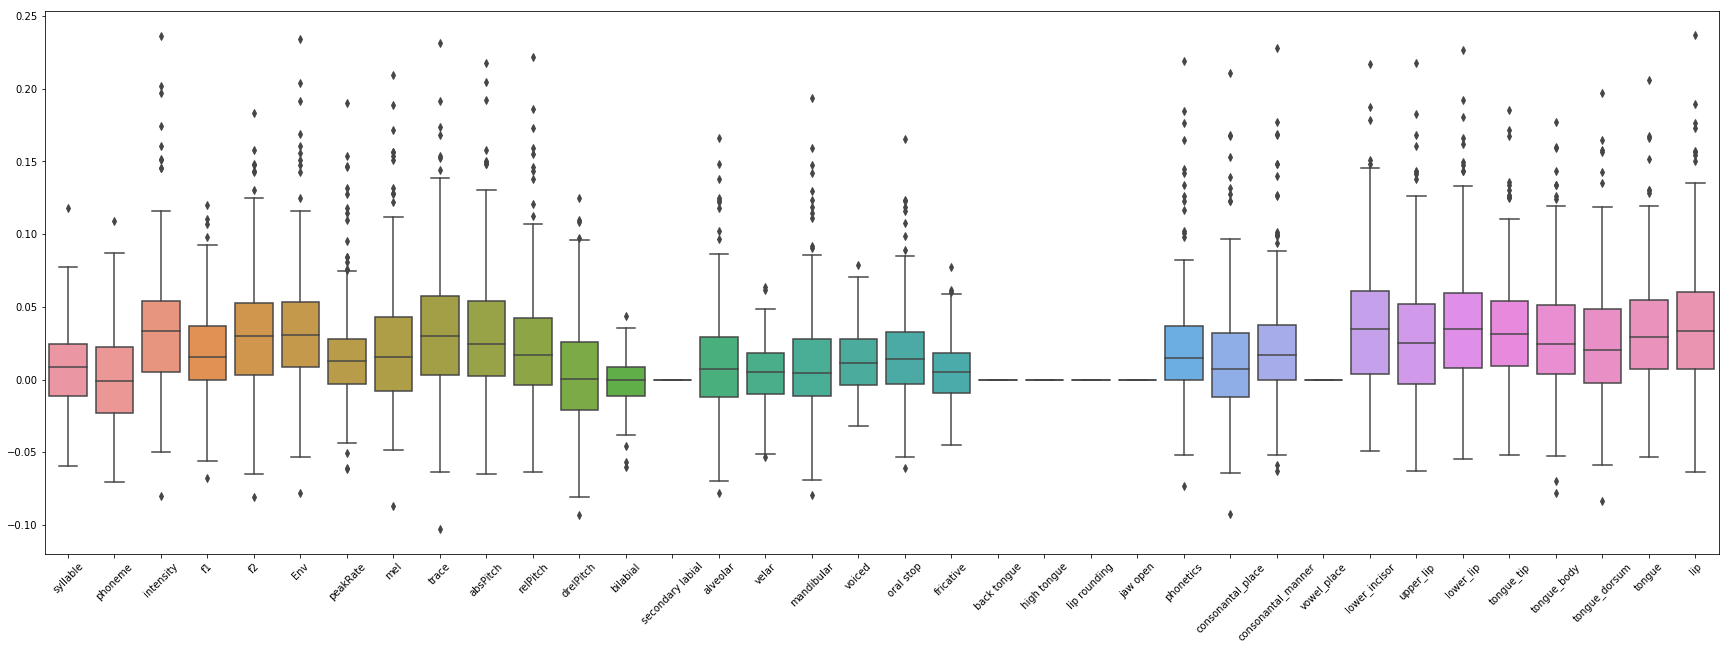

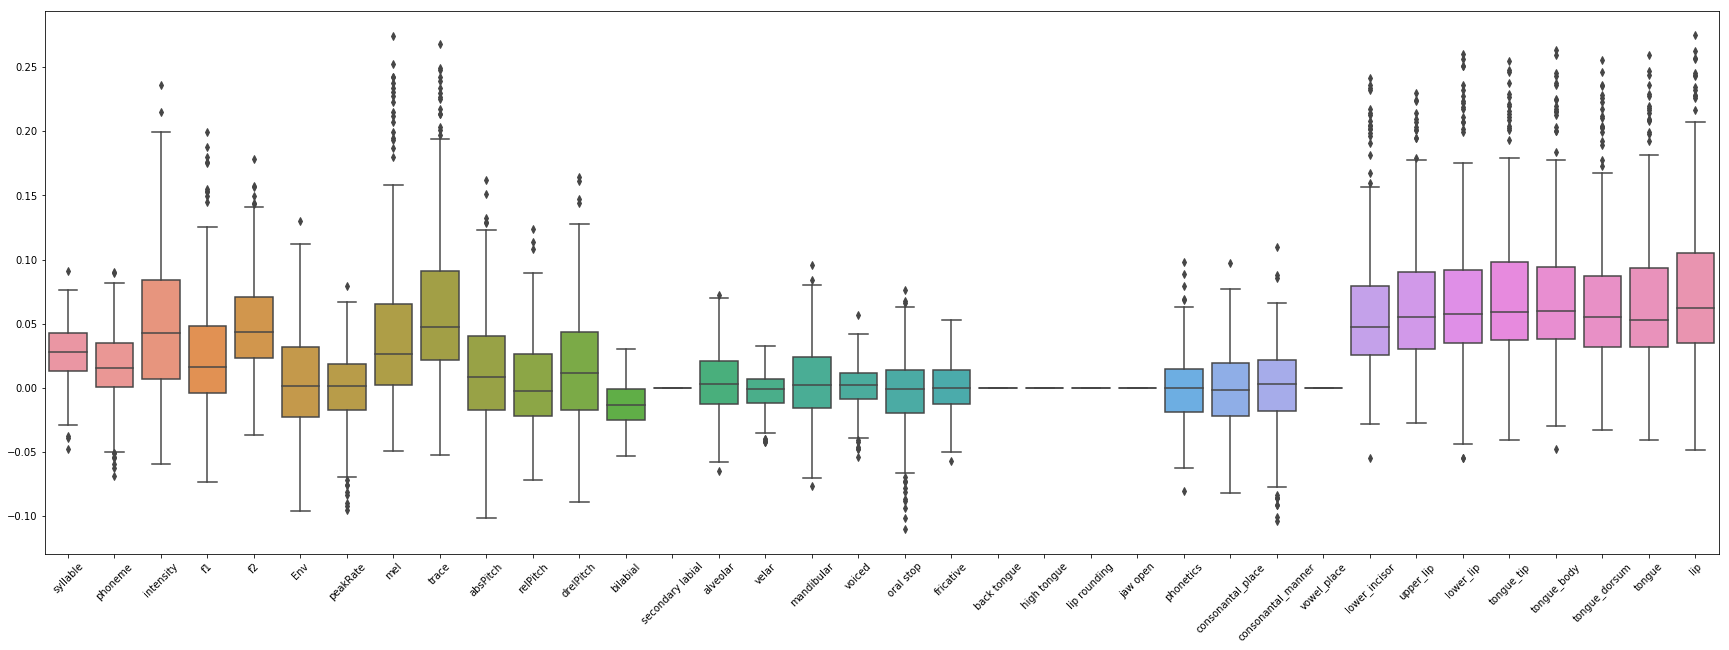

In [9]:
HS_list = [71,73,76,78]
task_name = "cue"

for HS in HS_list:
    print(HS)
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()
    plt.figure(figsize=(30,10))
    ax = sns.boxplot(data=pd.DataFrame(r_channel))
    ax.set_xticklabels(r_channel.keys(),rotation=45)

44
45
47
48
50
54
71
73
76
78


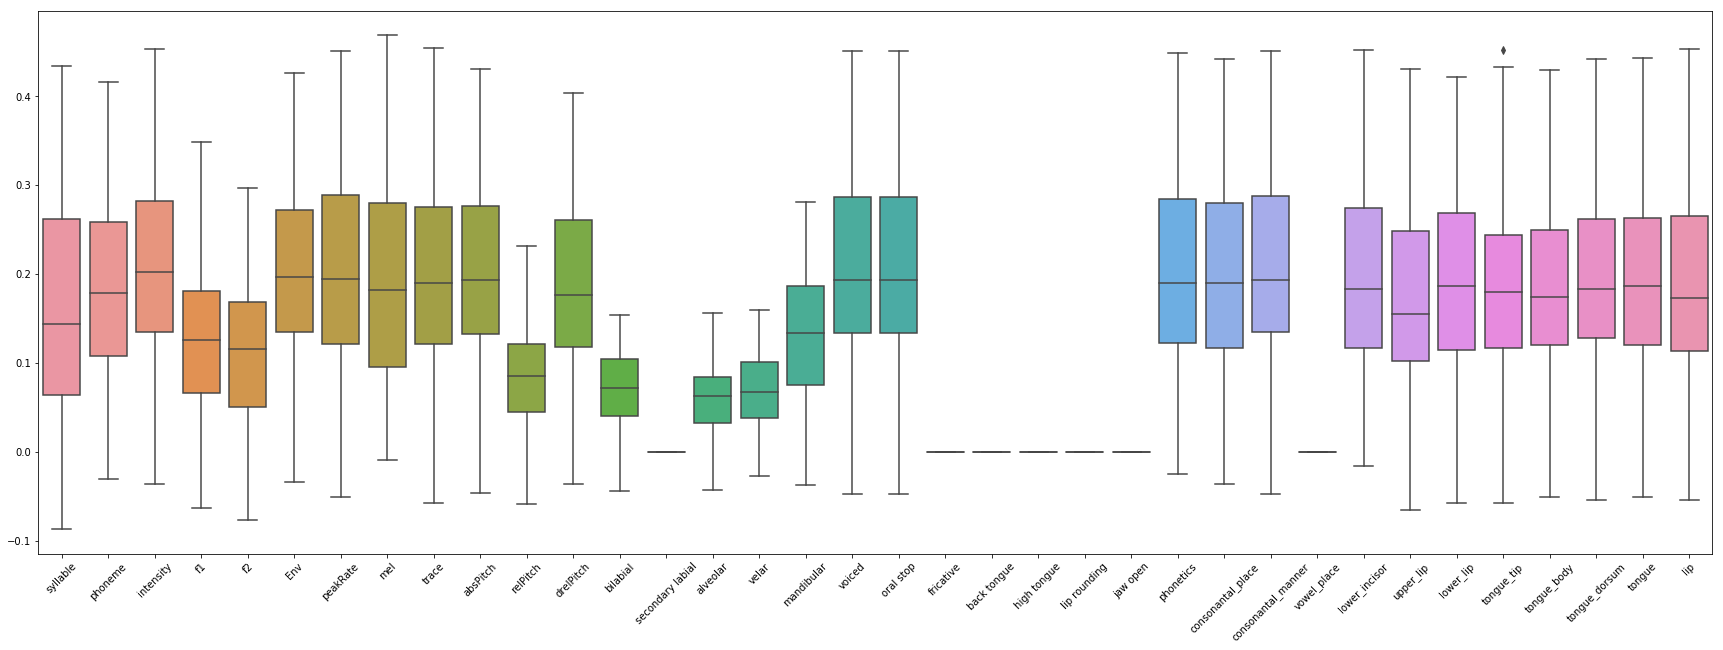

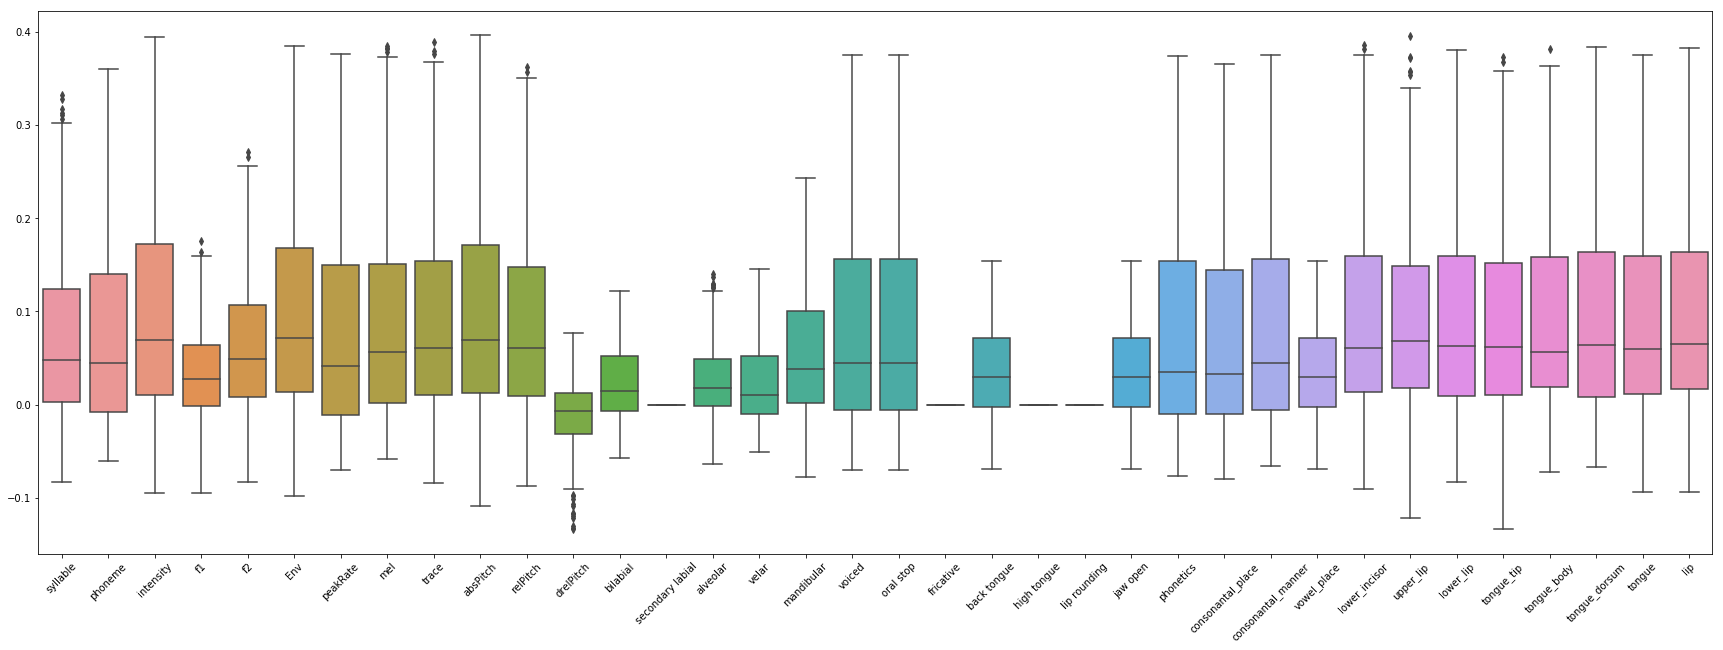

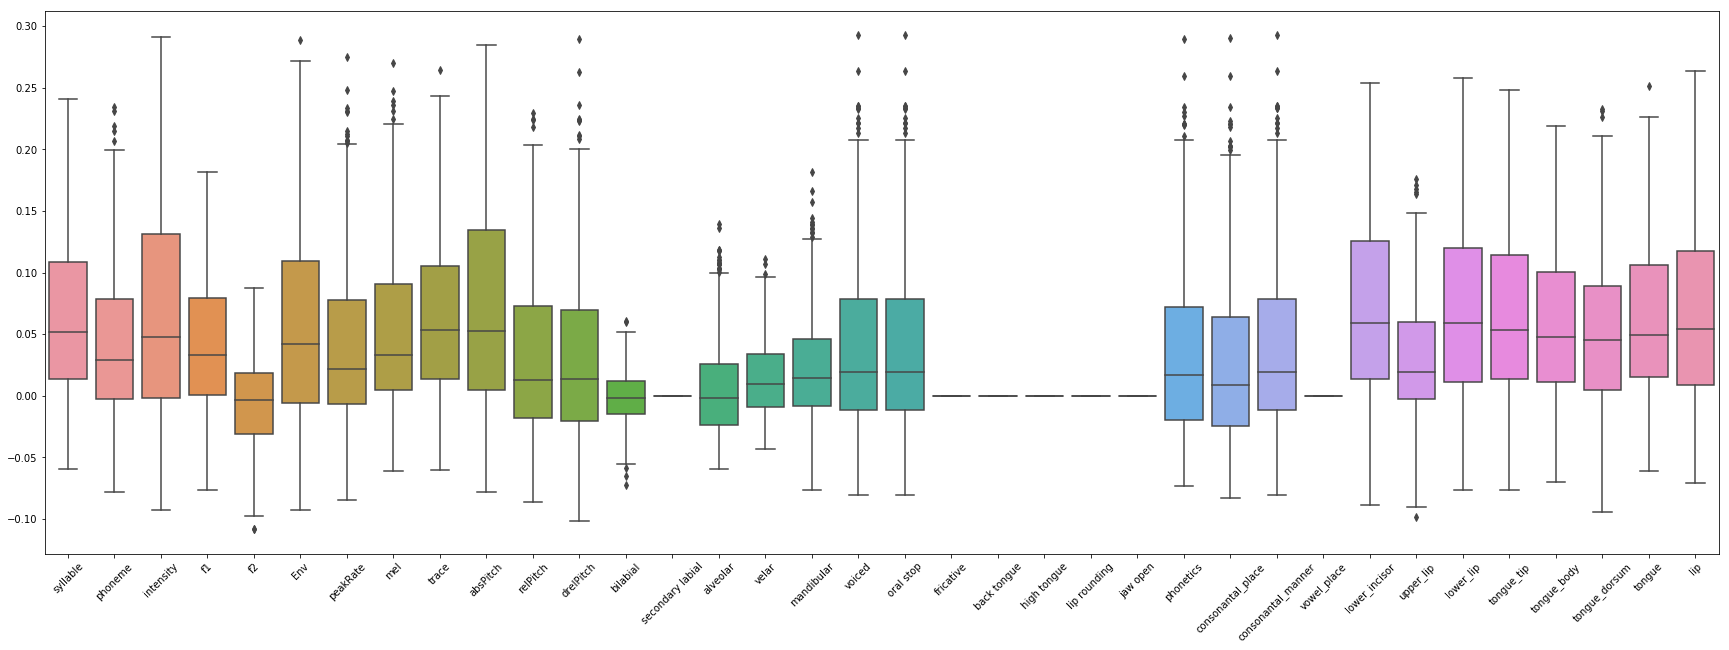

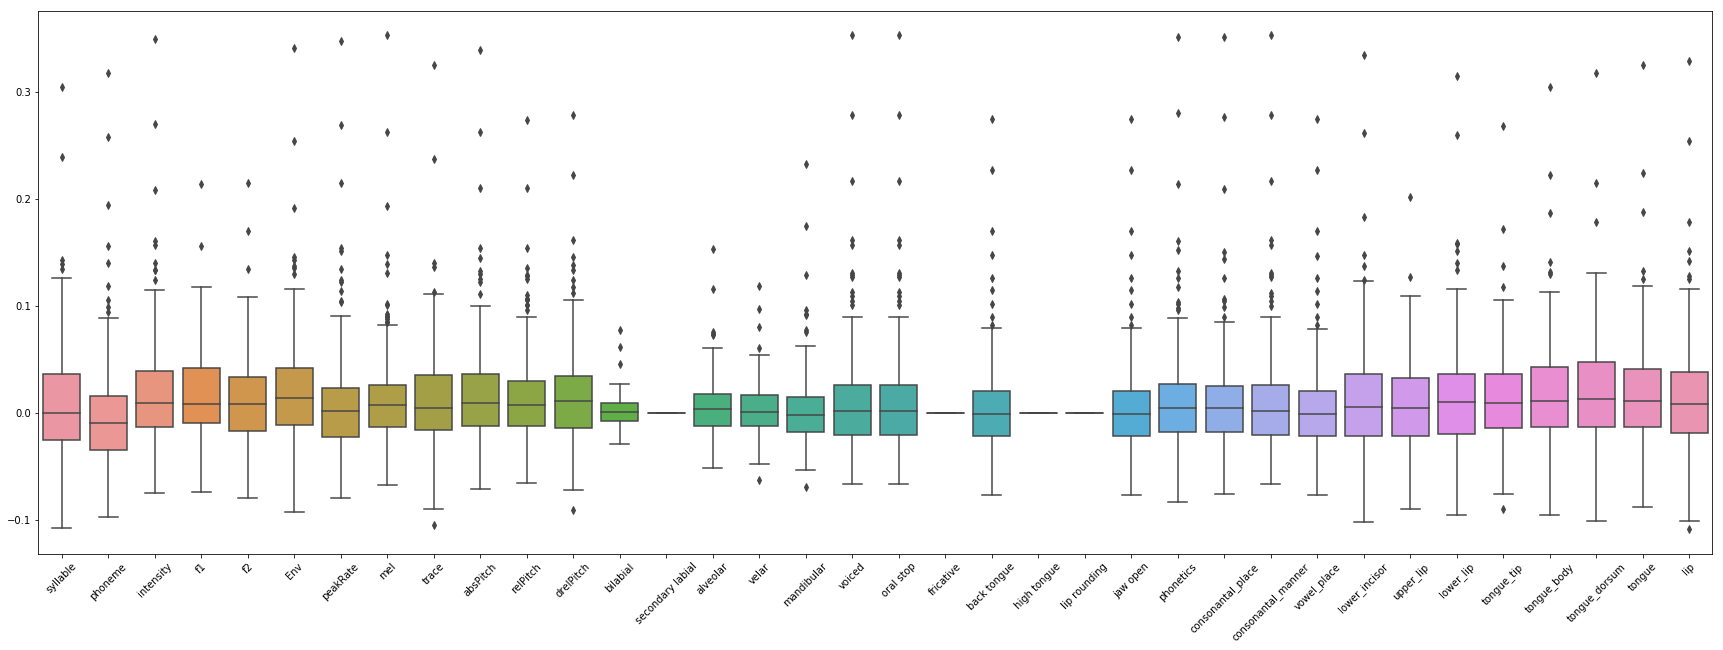

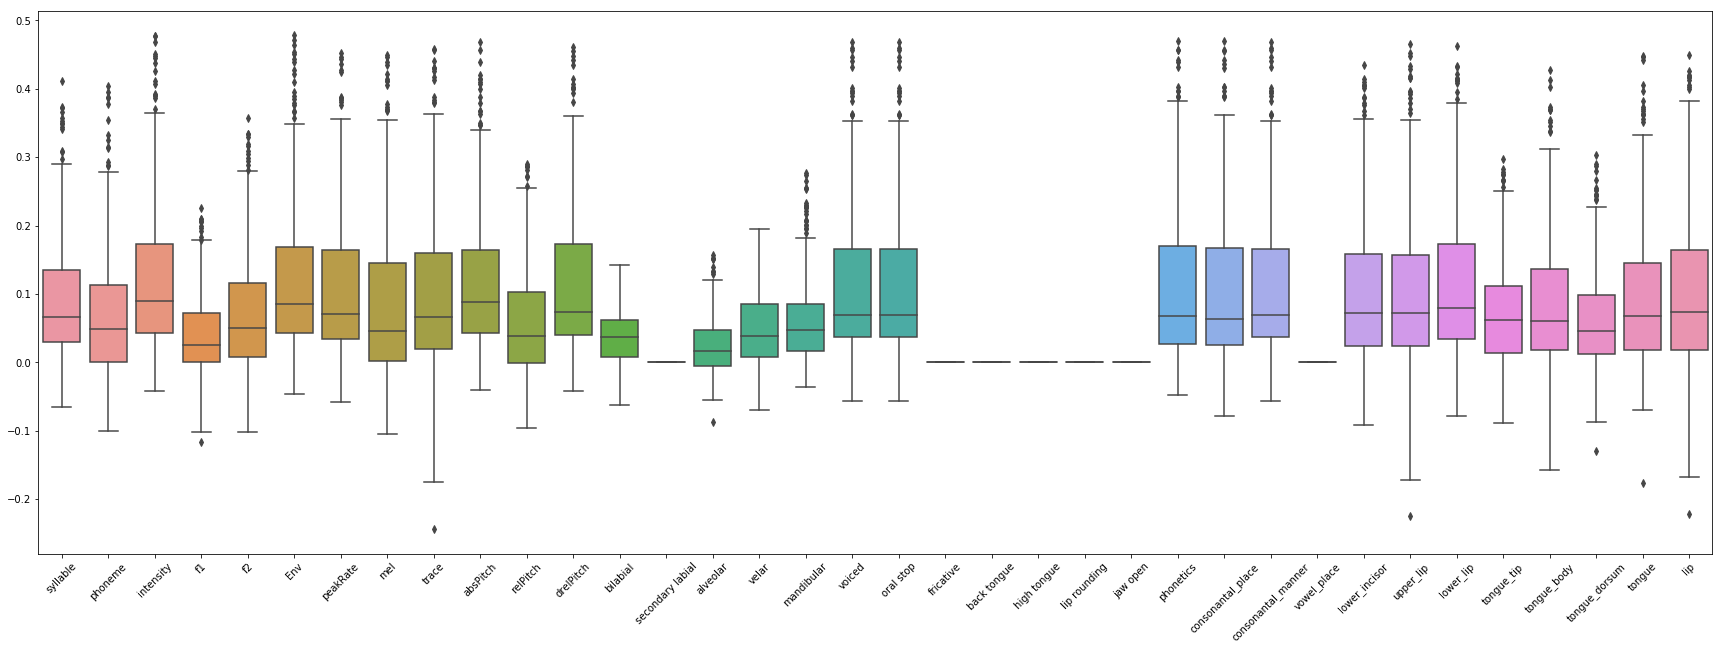

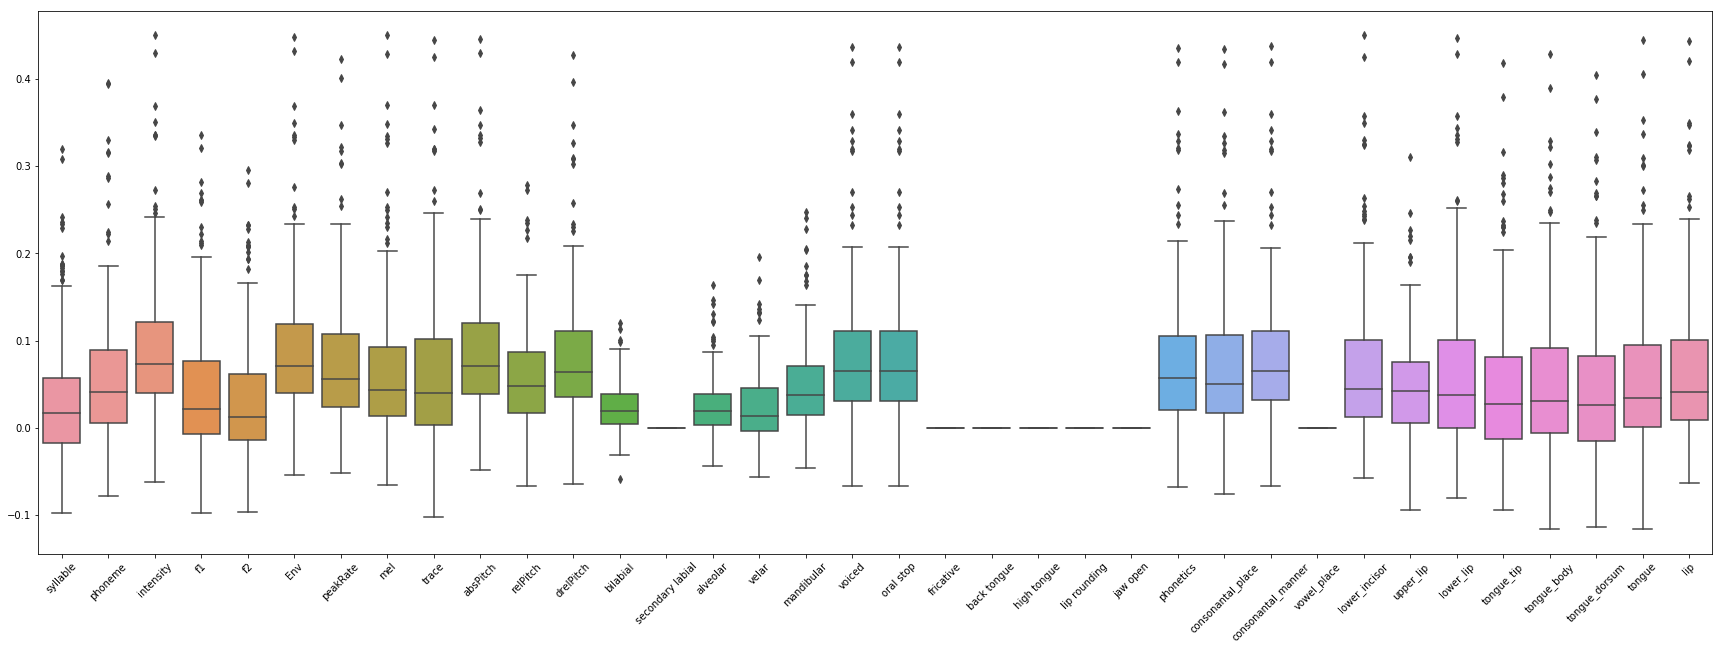

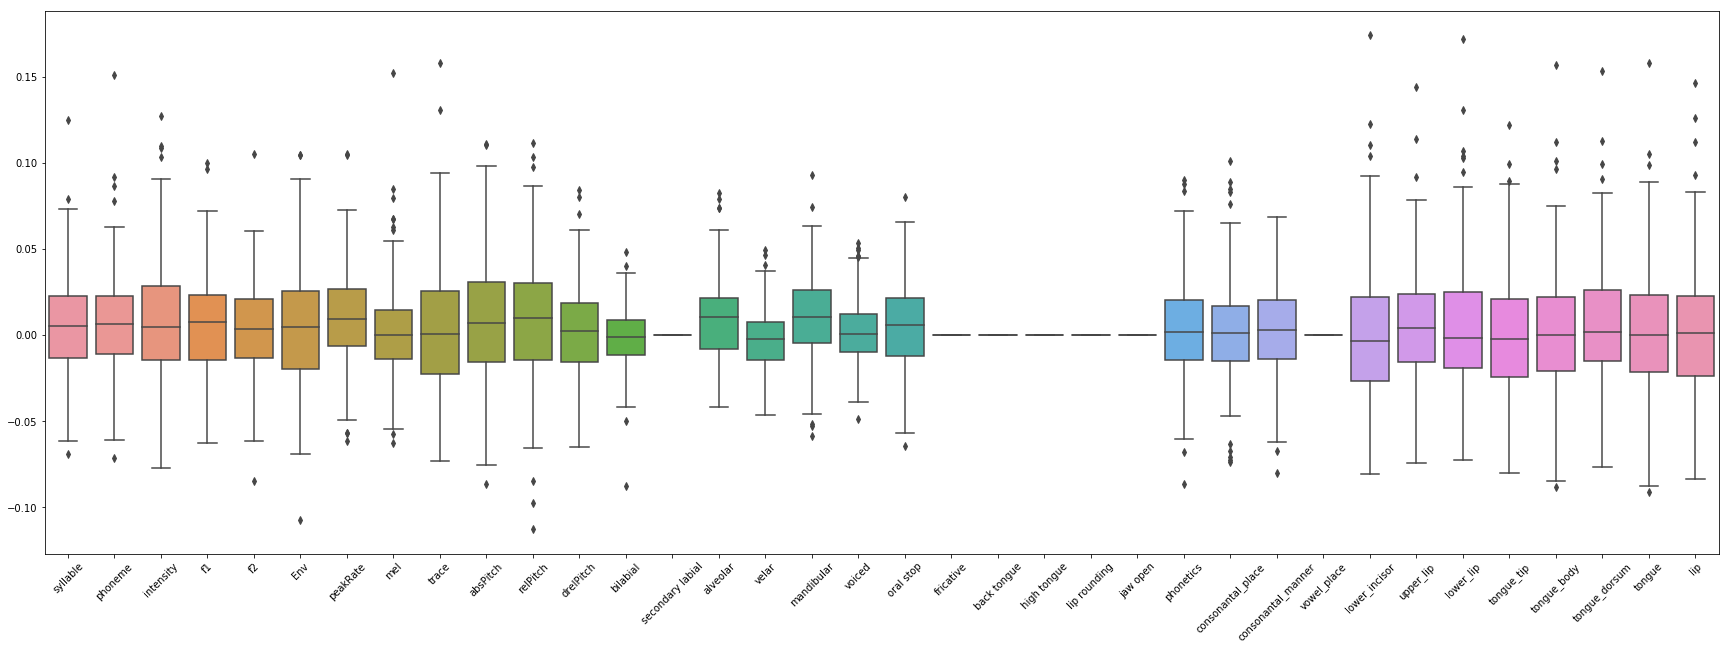

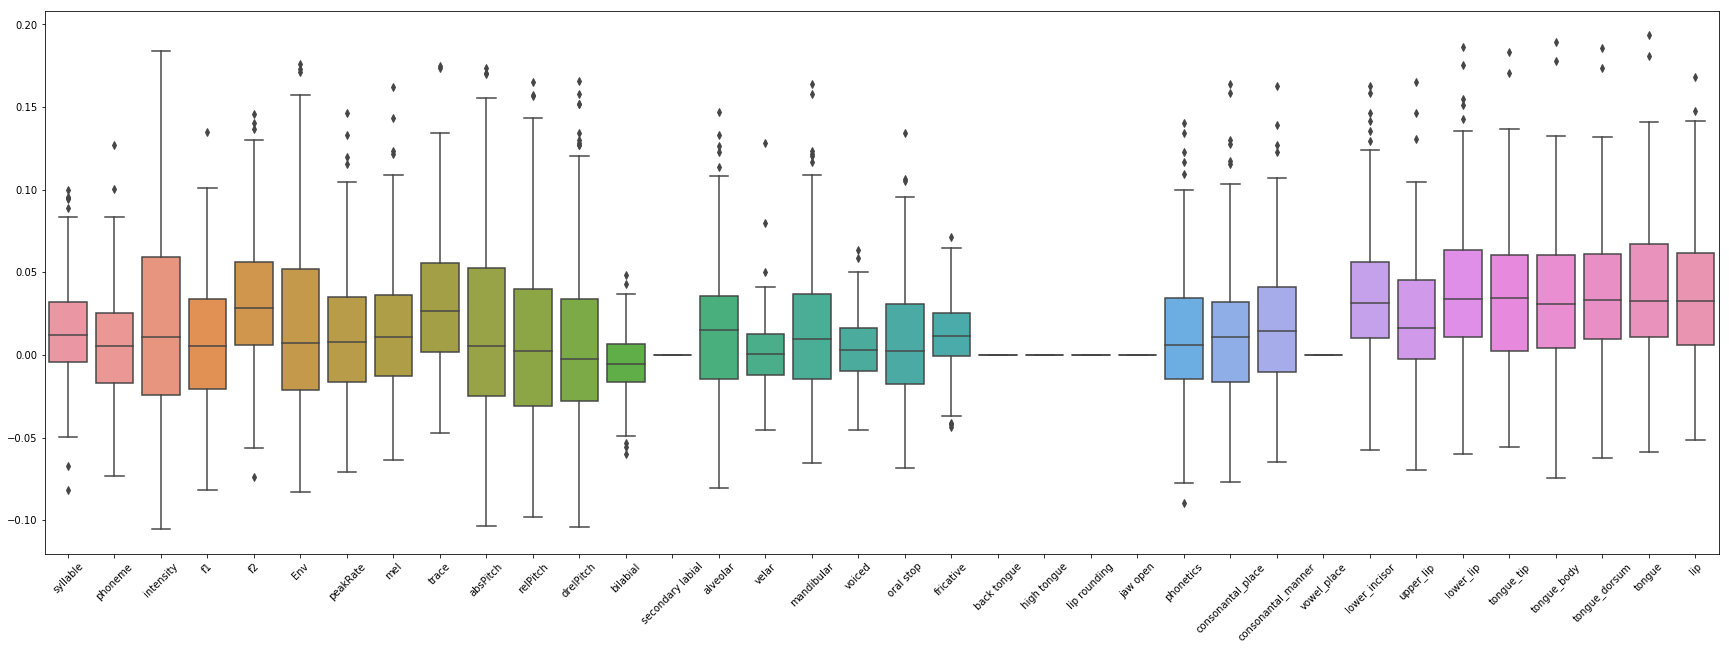

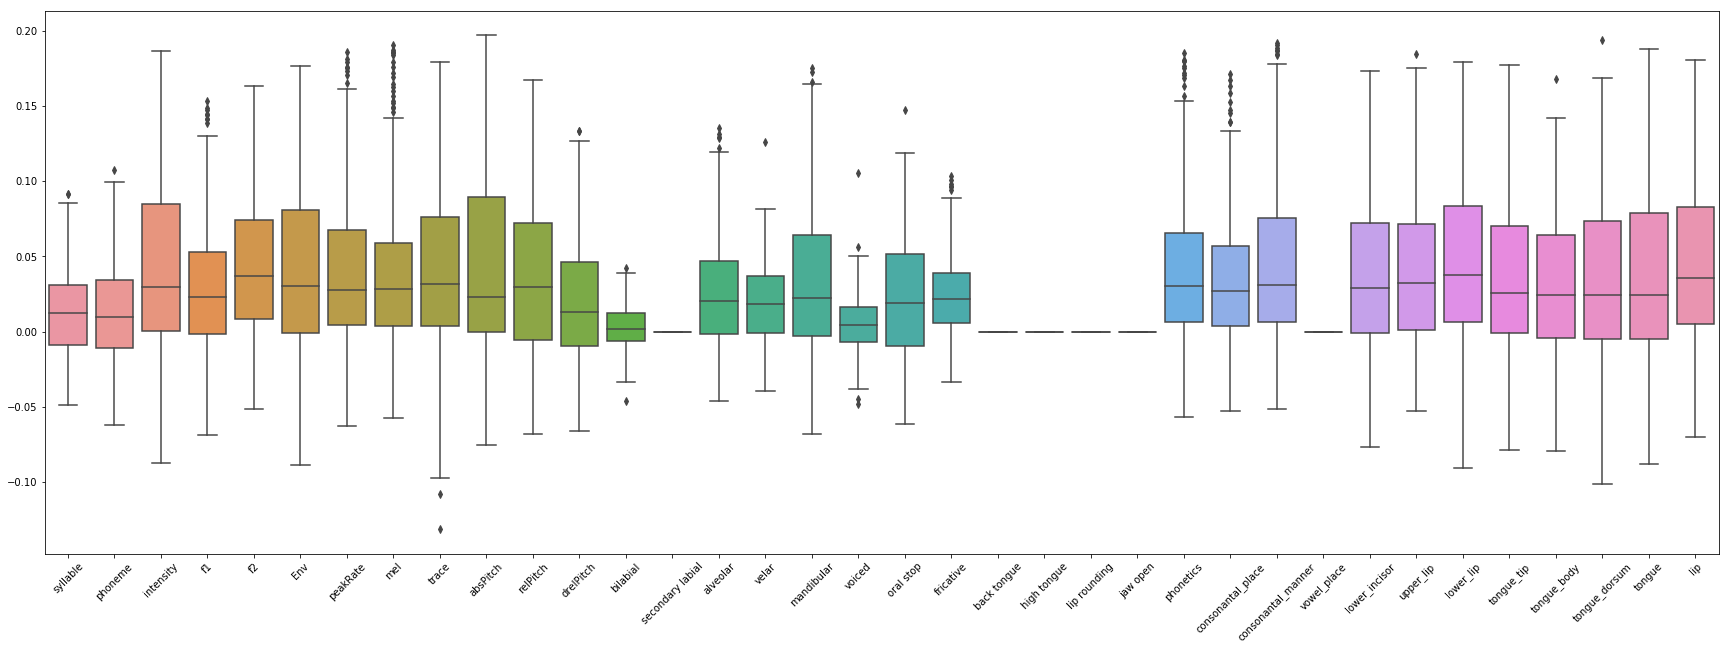

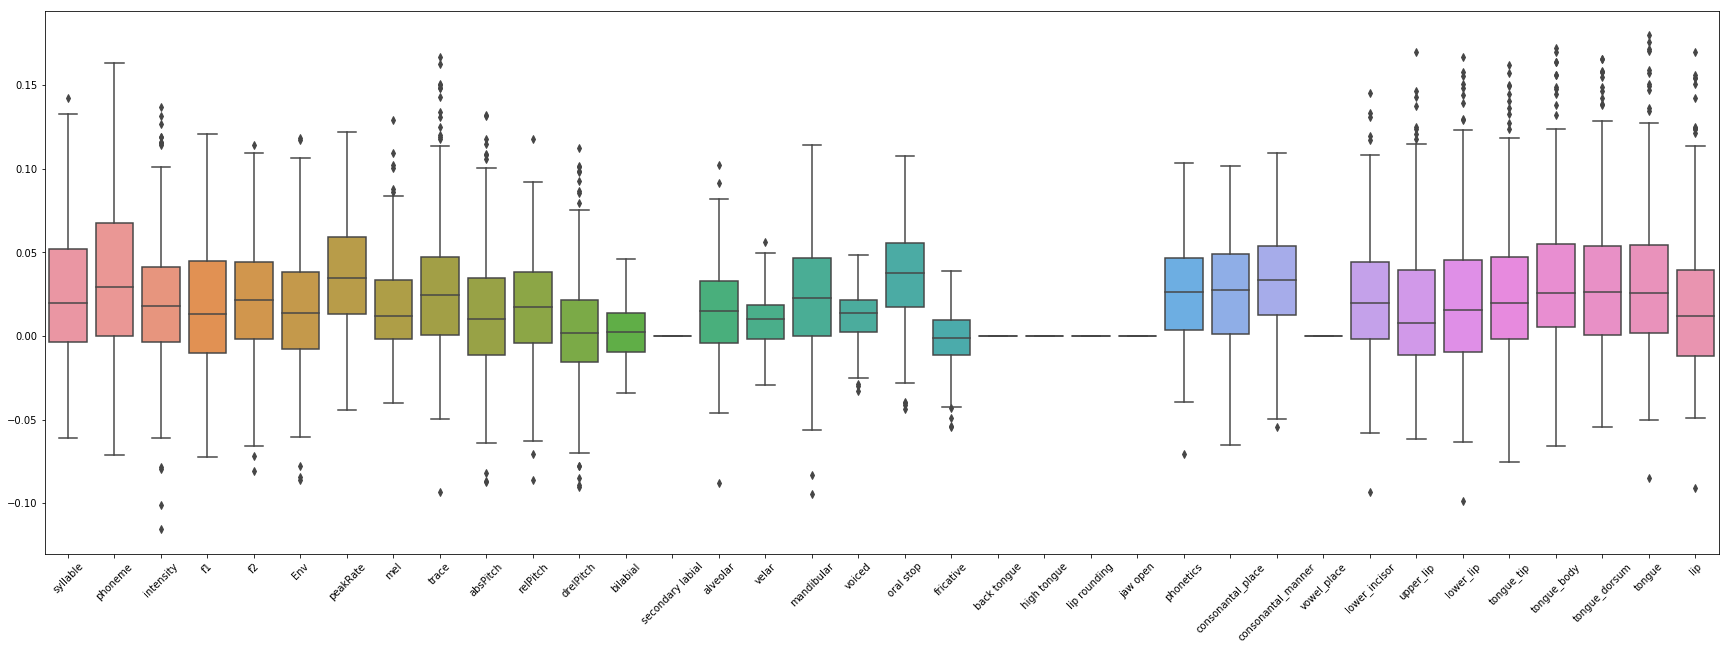

In [10]:
HS_list = [44,45,47,48,50,54,71,73,76,78]
task_name = "covert"

for HS in HS_list:
    print(HS)
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()
    plt.figure(figsize=(30,10))
    ax = sns.boxplot(data=pd.DataFrame(r_channel))
    ax.set_xticklabels(r_channel.keys(),rotation=45)

44


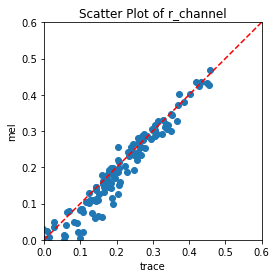

45


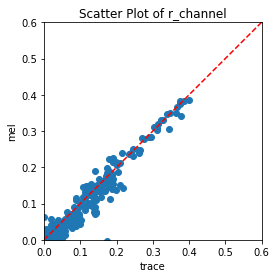

47


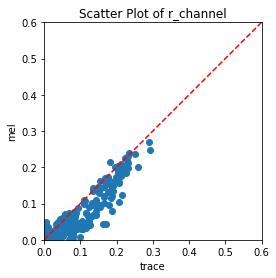

48


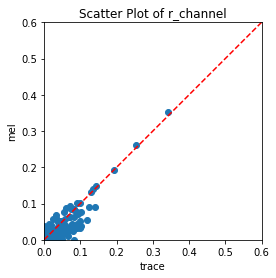

50


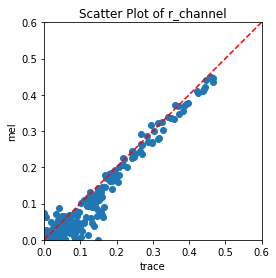

54


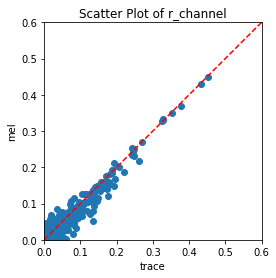

71


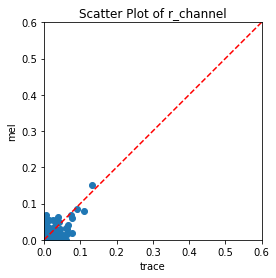

73


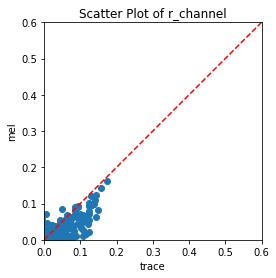

76


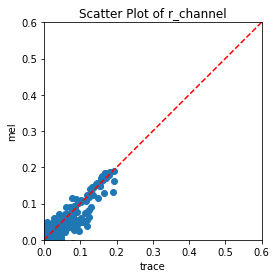

In [18]:
HS_list = [44,45,47,48,50,54,71,73,76]
task_name = "covert"
x_label = "trace"
y_label = "mel"


for HS in HS_list:
    print(HS)
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()

    # 提取r_channel字典中的'trace'和'mel'作为x和y轴数据
    x = r_channel[x_label]
    y = r_channel[y_label]

    # 绘制散点图
    plt.scatter(x, y)

    # 设置x和y轴的范围相同，使其对称
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.plot([0, 0.6], [0, 0.6], color='red', linestyle='--')

    # 设置x和y轴的范围为0到0.6
    plt.xlim(0, 0.6)
    plt.ylim(0, 0.6)
    
    # 添加标题和轴标签
    plt.title('Scatter Plot of r_channel')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # 显示图形
    plt.show()

44


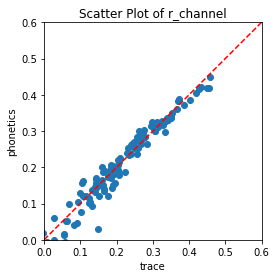

45


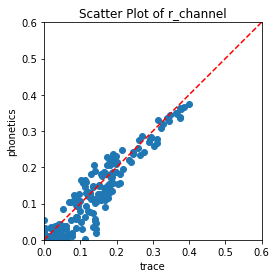

47


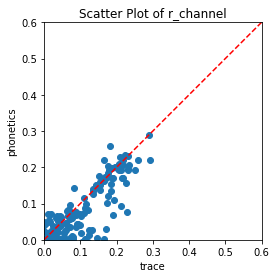

48


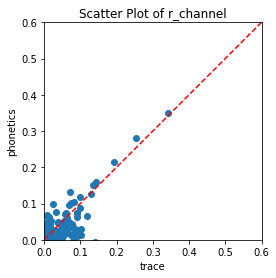

50


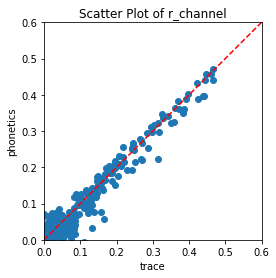

54


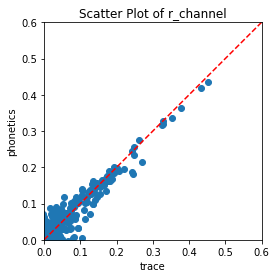

71


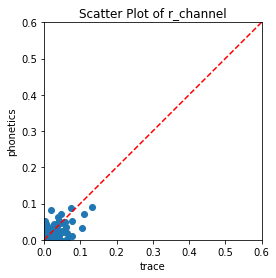

73


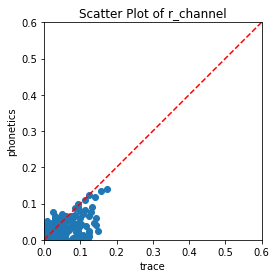

76


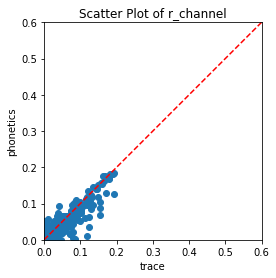

In [19]:
HS_list = [44,45,47,48,50,54,71,73,76]
task_name = "covert"
x_label = "trace"
y_label = "phonetics"


for HS in HS_list:
    print(HS)
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    r_channel = np.load(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_corr_channel.npy", allow_pickle=True).item()

    # 提取r_channel字典中的'trace'和'mel'作为x和y轴数据
    x = r_channel[x_label]
    y = r_channel[y_label]

    # 绘制散点图
    plt.scatter(x, y)

    # 设置x和y轴的范围相同，使其对称
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.plot([0, 0.6], [0, 0.6], color='red', linestyle='--')

    # 设置x和y轴的范围为0到0.6
    plt.xlim(0, 0.6)
    plt.ylim(0, 0.6)
    
    # 添加标题和轴标签
    plt.title('Scatter Plot of r_channel')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # 显示图形
    plt.show()

# 进行uni R2的计算

In [6]:
feature_pool = {}
ex_features = {}
feature_pool["phonetic_model"] = ['bilabial', 'secondary labial', 'alveolar', 'velar', 
               'mandibular', 'voiced', 'oral stop', 'fricative', 
               'back tongue', 'high tongue', 'lip rounding', 
               'jaw open']
ex_features["phonetic_model"] = ['bilabial', 'secondary labial', 'alveolar', 'velar', 
               'mandibular', 'voiced', 'oral stop', 'fricative', 
               'back tongue', 'high tongue', 'lip rounding', 
               'jaw open']

# feature_pool["at_model"] = ["relPitch","lower_incisor","tongue","lip"]
# ex_features["at_model"] = ["relPitch","lower_incisor","tongue","lip"]

feature_pool["trace_model"] = ["relPitch","lower_incisor","upper_lip","lower_lip","tongue_tip","tongue_body","tongue_dorsum"]
ex_features["trace_model"] = ["relPitch","lower_incisor","upper_lip","lower_lip","tongue_tip","tongue_body","tongue_dorsum"]

feature_pool["audio_model"] = ['syllable', 'intensity', 'absPitch', 'f1', 'f2', 'peakRate']
ex_features["audio_model"] = ['syllable', 'intensity', 'absPitch', 'f1', 'f2', 'peakRate']

feature_pool["phonetic_model_2"] = ['consonantal_place', 'consonantal_manner', 'vowel_place']
ex_features["phonetic_model_2"] = ['consonantal_place', 'consonantal_manner', 'vowel_place']

def run_exclude_feature(HS,model,ex_features,feature_pool,task_name = "covert"):
    """"
    ex_feature 是个列表，生成里面所有的delta
    feature_pool 是feature计算的总体
    """ 
    ex_features = ex_features[model]
    feature_pool = feature_pool[model]
    save_path = clean_data_path + "TRF/"+"HS"+str(HS)+"/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    mat_file_name = save_path+"HS"+str(HS)+"_"+task_name+"_"+"_feat_mat.npy"
    if os.path.exists(mat_file_name):
        feat_mat = np.load(mat_file_name,allow_pickle=True).item()
    else:
        feat_mat = get_feat(HS,task_name)
        np.save(mat_file_name,feat_mat)
    print(HS)
    
    nn_features_with_all = ["all"]
    for ex_feature in ex_features:
        feat_mat["ex_"+ex_feature] = []
        nn_features_with_all.append("ex_"+ex_feature)
        
        for i in range(len(feature_pool)):
            if feature_pool[i] != ex_feature:
                if len(feat_mat["ex_"+ex_feature]) == 0:
                    feat_mat["ex_"+ex_feature] = feat_mat[feature_pool[i]] 
                else:
                    feat_mat["ex_"+ex_feature] =np.concatenate((feat_mat["ex_"+ex_feature],feat_mat[feature_pool[i]] ),axis=1) 
    feat_mat["all"] = []         
    for i in range(len(feature_pool)):
            
        if len(feat_mat["all"]) == 0:
            feat_mat["all"] = feat_mat[feature_pool[i]] 
        else:
            feat_mat["all"] =np.concatenate((feat_mat["all"],feat_mat[feature_pool[i]] ),axis=1) 
    print(nn_features_with_all)    
        
   

    fs = 10
    ds_a = -30
    ds_p = 30
    delays = np.arange(ds_a, ds_p)

    r2_channel = {}
    r_channel = {}
    wts_folds_all = {}
    best_alphas_all = {}

    for nn_feat_name in nn_features_with_all:
        print(nn_feat_name)
        dstim = feat_mat[nn_feat_name]
        resp = feat_mat["hg"]
        test_corr_folds, wts_folds, best_alphas, pred_all = run_cv_temporal_ridge_regression_model(
            dstim, resp, delays=delays, pred=True)
        
        r2 = np.sum(test_corr_folds ** 2, axis=0) / test_corr_folds.shape[0]
        r = np.mean(test_corr_folds, axis=0)
        
        r2_channel[nn_feat_name] = r2
        r_channel[nn_feat_name] = r
        wts_folds_all[nn_feat_name] = wts_folds
        best_alphas_all[nn_feat_name] = best_alphas

    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_"+model+"_r2_channel.npy",r2_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_"+model+"_corr_channel.npy",r_channel)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_"+model+"_wts_folds_all.npy",wts_folds_all)
    np.save(save_path+"HS"+str(HS)+"_"+task_name+"_"+str(int(ds_a*fs))+str(int(ds_p*fs))+"_"+model+"_best_alphas_all.npy",best_alphas_all)
    print(str(HS)+" complete")
        

In [13]:
# HS_list = [44,45,47,48,50,54,71,73,76]
HS_list = [78]

# task_name_list = ["overt","covert"]

# for model in ["phonetic_model","trace_model","at_model","audio_model"]:
for model in ["phonetic_model","trace_model","audio_model"]:
# for model in ["audio_model"]:
    for HS in HS_list:
        if HS < 70:
            task_name_list = ['overt', 'covert']
        else:
            task_name_list = ['overt', 'covert']
        for task_name in task_name_list:
            print(task_name)
            run_exclude_feature(HS,model,ex_features,feature_pool,task_name)

overt
78
['all', 'ex_bilabial', 'ex_secondary labial', 'ex_alveolar', 'ex_velar', 'ex_mandibular', 'ex_voiced', 'ex_oral stop', 'ex_fricative', 'ex_back tongue', 'ex_high tongue', 'ex_lip rounding', 'ex_jaw open']
all
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_bilabial
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_secondary labial
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_alveolar
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_velar
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_mandibular
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_voiced
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_oral stop
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_fricative
Running fold 0. Running fold 1. Running

In [14]:
# HS_list = [71,73,76]
HS_list = [78]
task_name_list = ["cue"]
# for model in ["phonetic_model","trace_model","at_model","audio_model"]:
for model in ["phonetic_model","trace_model","audio_model"]:
# for model in ["audio_model"]:
    for HS in HS_list:
#         if HS < 70:
#             task_name_list = ['overt', 'covert']
#         else:
#             task_name_list = ['overt', 'covert']
        for task_name in task_name_list:
            print(task_name)
            run_exclude_feature(HS,model,ex_features,feature_pool,task_name)

cue
78
['all', 'ex_bilabial', 'ex_secondary labial', 'ex_alveolar', 'ex_velar', 'ex_mandibular', 'ex_voiced', 'ex_oral stop', 'ex_fricative', 'ex_back tongue', 'ex_high tongue', 'ex_lip rounding', 'ex_jaw open']
all
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_bilabial
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_secondary labial
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_alveolar
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_velar
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_mandibular
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_voiced
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_oral stop
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_fricative
Running fold 0. Running fold 1. Running f

In [7]:
HS_list = [44,45,47,48,50,54,71,73,76,78]
# HS_list = [78]

# task_name_list = ["overt","covert"]

# for model in ["phonetic_model","trace_model","at_model","audio_model"]:
for model in ["phonetic_model_2"]:
# for model in ["audio_model"]:
    for HS in HS_list:
        if HS < 70:
            task_name_list = ['overt', 'covert']
        else:
            task_name_list = ['overt', 'covert']
        for task_name in task_name_list:
            print(task_name)
            run_exclude_feature(HS,model,ex_features,feature_pool,task_name)

overt
44
['all', 'ex_consonantal_place', 'ex_consonantal_manner', 'ex_vowel_place']
all
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_manner
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_vowel_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. 44 complete
covert
44
['all', 'ex_consonantal_place', 'ex_consonantal_manner', 'ex_vowel_place']
all
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_manner
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_vowel_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. 44 complete
overt
45
['all', 'ex_consonantal_place', 'e

Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_manner
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_vowel_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. 76 complete
overt
78
['all', 'ex_consonantal_place', 'ex_consonantal_manner', 'ex_vowel_place']
all
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_manner
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_vowel_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. 78 complete
covert
78
['all', 'ex_consonantal_place', 'ex_consonantal_manner', 'ex_vowel_place']
all
Running fold 0. Running fold 1. Running fol

In [8]:
HS_list = [71,73,76,78]
# HS_list = [78]
task_name_list = ["cue"]
# for model in ["phonetic_model","trace_model","at_model","audio_model"]:
for model in ["phonetic_model_2"]:
# for model in ["audio_model"]:
    for HS in HS_list:
#         if HS < 70:
#             task_name_list = ['overt', 'covert']
#         else:
#             task_name_list = ['overt', 'covert']
        for task_name in task_name_list:
            print(task_name)
            run_exclude_feature(HS,model,ex_features,feature_pool,task_name)

cue
71
['all', 'ex_consonantal_place', 'ex_consonantal_manner', 'ex_vowel_place']
all
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_manner
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_vowel_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. 71 complete
cue
73
['all', 'ex_consonantal_place', 'ex_consonantal_manner', 'ex_vowel_place']
all
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_consonantal_manner
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. ex_vowel_place
Running fold 0. Running fold 1. Running fold 2. Running fold 3. Running fold 4. 73 complete
cue
76
['all', 'ex_consonantal_place', 'ex_conso